### EDA for Bank's credit decisions

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [247]:
#### Importing all import liberies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings to avoid unnessary warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


#### Reading the data set

In [248]:
#reading the data set of "application_data" in application_data.
application_data = pd.read_csv('application_data.csv')

In [249]:
#reading the data set of "previous applications" in previous_application.
previous_application = pd.read_csv('previous_application.csv')

In [250]:
#finding the shape of both the data set
print('application_data shape', application_data.shape)
print('previous_application shape', previous_application.shape)

application_data shape (307511, 122)
previous_application shape (1670214, 37)


In [251]:
#printing the information to check their data types & Non null values
application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [252]:
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [253]:
#Displaying all column and rows of dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [254]:
# overlook on application_data dataset
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [255]:
# overlook on previous_application dataset
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Step 1 : Checking Null values 

In [256]:
len(application_data)

307511

In [257]:
#checking percentage wise null values in each column of application_data
percentage_null = ((application_data.isnull().sum()*100)/len(application_data)).sort_values(ascending=False)
percentage_null

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [258]:
#count of columns in application_data which have null values 
len(percentage_null[ percentage_null > 40 ])

49

### 1. Observation: In application_data there are total 49 columns where null values percentages are more than 40 % and this will unneccesarily cause impact on efficiency of our EDA process, also as per data undersatnding gain from columns descriptions, all these columns  contains information about clients building which is not that much required with respective to our problem statement.

### Approach taken : As per our observation 1, we can drop these column as it will not harm our further analysis.

In [259]:
len(previous_application)

1670214

In [260]:
#checking percentage wise null values in each column of previous_application
percentage_null_01 = ((previous_application.isnull().sum()*100)/len(previous_application)).round(2).sort_values(ascending=False)
percentage_null_01

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [261]:
#count of columns in application_data which have null values 
len(percentage_null_01[ percentage_null_01 > 30 ])

11

### 2. Observation : There are total 11 columns where null values percentages are greater than 30 % and 2 out of these 11 columns have 99.5% null values so its better to drop these 2 columns and also for remaining 9 columns, except the RATE_DOWN_PAYMENT, AMT_DOWN_PAYMENT and NFLAG_INSURED_ON_APPROVAL all other 6 columns related to previous applications dates which is not that much required in our EDA process, considering the problem statement and understanding gain from colums descriptions in mind.

### Approach taken : As per observation 2 , it will be better to drop these 8 columns as it is not required for our further EDA process


### Step : 2 Deleting unnecessary columns

In [262]:
#Deleting columns from application_data where null percentage are greater than 30 %
colm_names = (application_data.isnull().sum() / len(application_data))
colm_names = list(colm_names[colm_names.values >= 0.4].index)
application_data.drop(labels=colm_names, inplace=True, axis=1)

In [263]:
#checking new shape of application_data
application_data.shape

(307511, 73)

In [264]:
#Deleting columns from previous_application where null percentage are greater than 30 %
colm_names_01 = (previous_application.isnull().sum() / len(previous_application))
colm_names_01 = list(colm_names_01[colm_names_01.values >= 0.3].index)
colm_names_01.remove('RATE_DOWN_PAYMENT')
colm_names_01.remove('AMT_DOWN_PAYMENT')
colm_names_01.remove('NFLAG_INSURED_ON_APPROVAL')
previous_application.drop(labels=colm_names_01, inplace=True , axis=1)

In [265]:
#checking new shape of previous_application
previous_application.shape

(1670214, 29)

In [266]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### 3. Observation :  As per understanding gain from column description , all flag document columns are irrelevant to our analysis as these column doesn't mentioned the proper documents name which client has submitted hence it better to drop these columns as well

### Approach taken : As per observation 3, dropping these columns as it will not harm our further analysis.

In [267]:
#Deleting columns from application_data related to flag documents.
colm_names = application_data.columns.unique() 
colm_names = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]
application_data.drop(labels=colm_names, inplace=True, axis=1)

In [268]:
#checking new shape of application_data
application_data.shape

(307511, 53)

In [269]:
previous_application.shape

(1670214, 29)

### Imputing null values in application data

In [270]:
#Imputing null values in application_data
(application_data.isnull().sum()*100 / len(application_data)).round(2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
CNT_FAM_MEMBERS                 0.00
ORGANIZATION_TYPE               0.00
DAYS_LAST_PHONE_CHANGE          0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
REGION_RATING_CLIENT_W_CITY     0.00
REGION_RATING_CLIENT            0.00
L

#### Analyzing Occupation type column
- As there are 31.35 % values are missing for occupation type we can assigned those missing values as 'Missing' category as replacing these values with 'MODE' will not make any sense and also this may be driving variable for our analysis hence replacing these with another category is good approach.


In [271]:
#Replacing Null values with missing category
application_data['OCCUPATION_TYPE'].fillna(value='Missing', inplace=True)

In [272]:
#Checking null values in occupation_type column
application_data.OCCUPATION_TYPE.isnull().sum()

0

In [273]:
#Cheking frequency of unique values of gender
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [274]:
# As there are only 4 count of XNA value we can replace those with female value as this is most occured gender.
application_data['CODE_GENDER'].replace('XNA', 'F', inplace=True)

#### Analyzing EXT_SOURCE_3 column
- As there are 19.83 % of null values in EXT_SOURCE_3 column let check correlation of this variable with target variable

In [275]:
# ploting a correlation matrix of EXT_SOURCE_3 and target variable
application_data[['EXT_SOURCE_3','TARGET']].corr()

EXT_SOURCE_3    TARGET
EXT_SOURCE_3      1.000000 -0.178919
TARGET           -0.178919  1.000000

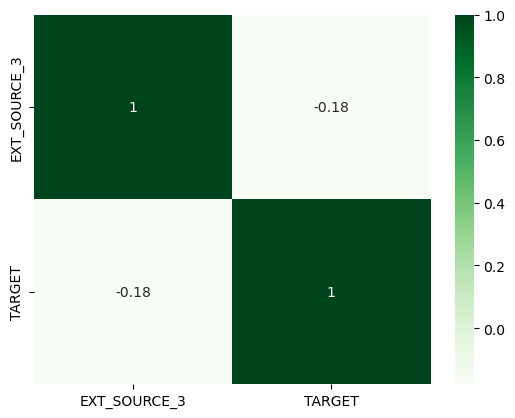

In [276]:
sns.heatmap(application_data[['EXT_SOURCE_3','TARGET']].corr(), annot=True, cmap='Greens');

In [277]:
EXT_SOURCE_3_median = application_data['EXT_SOURCE_3'].median()

In [278]:
# As there is no replation between target variable and EXT_SOURCE_3 variable we can simply replace there values with median
# values

application_data['EXT_SOURCE_3'].fillna(value=EXT_SOURCE_3_median, inplace=True)

In [279]:
#Checking for null values in EXT_SOURCE_3_median column
application_data['EXT_SOURCE_3'].isnull().sum()

0

#### Analyzing below columns where number of enquires happened in hourly,daily,weekly,monthly,quartly and yearly span of time

In [280]:
application_data[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON',
                  'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY']].describe()

AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              265992.000000               265992.000000   
mean                    0.265474                    0.006402   
std                     0.794056                    0.083849   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                   261.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR  \
count              265992.000000               265992.000000   
mean                    0.267395                    1.899974   
std                     0.916002                    1.869295   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    1.000000   
75%                     0.000000                    3.000000   
max                    27.000000                   25.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  
count               265992.000000              265992.000000  
mean                     0.034362                   0.007000  
std                      0.204685                   0.110757  
min                      0.000000                   0.000000  
25%                      0.000000                   0.000000  
50%                      0.000000                   0.000000  
75%                      0.000000                   0.000000  
max                      8.000000                   9.000000

### Observation : As we can see max value is way higher than min and quartiles of above columns so replacing null values with mean is not good idea hence we can simply replace null values mode values and this will not impact our further analysis

In [281]:
AMT_REQ_CREDIT_BUREAU_HOUR_Mode = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]
AMT_REQ_CREDIT_BUREAU_DAY_Mode = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]
AMT_REQ_CREDIT_BUREAU_WEEK_Mode = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]
AMT_REQ_CREDIT_BUREAU_MON_Mode = application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
AMT_REQ_CREDIT_BUREAU_QRT_Mode = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]
AMT_REQ_CREDIT_BUREAU_YEAR_Mode = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

In [282]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna( value = AMT_REQ_CREDIT_BUREAU_HOUR_Mode, inplace=True )
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna( value = AMT_REQ_CREDIT_BUREAU_DAY_Mode, inplace=True )
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna( value = AMT_REQ_CREDIT_BUREAU_WEEK_Mode, inplace=True )
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna( value = AMT_REQ_CREDIT_BUREAU_MON_Mode, inplace=True )
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna( value = AMT_REQ_CREDIT_BUREAU_QRT_Mode, inplace=True )
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna( value = AMT_REQ_CREDIT_BUREAU_YEAR_Mode, inplace=True )

#### For all columns where percentage of null values is very less i.e near to 0 percentage and dtype is float or int we can simply replace null values of that column with median so it will not impact our analysis

In [283]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna( value = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True )
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna( value = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True )
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna( value = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True )
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna( value = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True )
application_data['EXT_SOURCE_2'].fillna( value = application_data['EXT_SOURCE_2'].median(), inplace=True )
application_data['AMT_GOODS_PRICE'].fillna( value = application_data['AMT_GOODS_PRICE'].median(), inplace=True )
application_data['AMT_ANNUITY'].fillna( value = application_data['AMT_ANNUITY'].median(), inplace=True )
application_data['CNT_FAM_MEMBERS'].fillna( value = application_data['CNT_FAM_MEMBERS'].median(), inplace=True )
application_data['DAYS_LAST_PHONE_CHANGE'].fillna( value = application_data['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True )

#### Analyzing 'NAME_TYPE_SUITE' column

In [284]:
application_data.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [285]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [286]:
### As we can see from above information 'Unaccompanied' category occured most in NAME_TYPE_SUITE column so we can replace null
### values with that category.
application_data['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace= True)

#### Checking null values in application_data

In [287]:
((application_data.isnull().sum()*100)/len(application_data)).sort_values(ascending=False)

SK_ID_CURR                     0.0
OCCUPATION_TYPE                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
CNT_FAM_MEMBERS                0.0
FLAG_EMAIL                     0.0
TARGET                         0.0
FLAG_PHONE          

### Imputing null values of previous_application

In [288]:
((previous_application.isnull().sum()*100)/len(previous_application)).sort_values(ascending=False)

AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
CODE_REJECT_REASON              0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCES

In [289]:
# Checking basis statistical details 
previous_application['AMT_DOWN_PAYMENT'].describe().round(2)

count     774370.0
mean        6697.4
std        20921.5
min           -0.9
25%            0.0
50%         1638.0
75%         7740.0
max      3060045.0
Name: AMT_DOWN_PAYMENT, dtype: float64

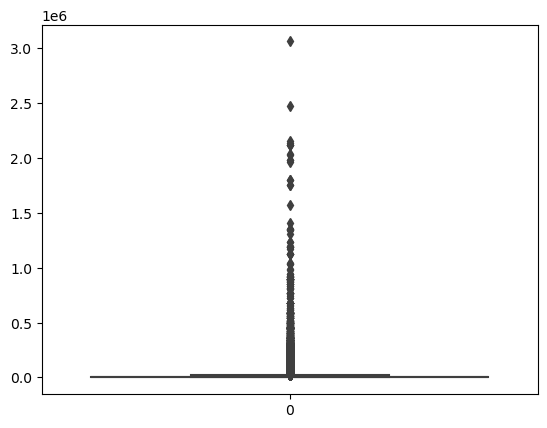

In [290]:
# Checking spread and skewness of data using box plot 
sns.boxplot(previous_application['AMT_DOWN_PAYMENT']);

### Observation : As we can see 50% of AMT_DOWN_PAYMENT is below 1638 so we can replace all null values in these column with 50% quartile (median). dropping this is not god idea because as down payment amount may useful for us in our further analysis hence will keep these column for our analysis
### Replacing with mean value is not good approach as this column has outlier values.

In [291]:
previous_application['AMT_DOWN_PAYMENT'].quantile(0.5)

1638.0

In [292]:
# Imputing 50% quantile with all null values of AMT_DOWN_PAYMENT column
previous_application['AMT_DOWN_PAYMENT'].fillna(value=previous_application['AMT_DOWN_PAYMENT'].quantile(0.5), inplace=True)

In [293]:
# Checking basis statistical details of RATE_DOWN_PAYMENT column
previous_application['RATE_DOWN_PAYMENT'].describe()

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

### Observation : As we can see 50% of RATE_DOWN_PAYMENT is below 0.05 so we can replace all null values in these column with 50% quartile(median). dropping this is not god idea because as down payment rate may useful for us in our further analysis hence will keep these column for our analysis

In [294]:
previous_application['RATE_DOWN_PAYMENT'].quantile(0.5)

0.051605084707529295

In [295]:
# Imputing 50% quantile with all null values of RATE_DOWN_PAYMENT column
previous_application['RATE_DOWN_PAYMENT'].fillna(value=previous_application['RATE_DOWN_PAYMENT'].quantile(0.5), inplace=True)

In [296]:
# Checking values of NFLAG_INSURED_ON_APPROVAL
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

### Observation : Here as we can see client who asked for insurance on prevoius application is half of the client who does not asked for insurance. so if we eplace null values with any of these it may impact our further analysis and also we can not drop these column as well because there might relation of these with any direct driving variable.as people asking for insurance are sound to be one who has well education of fianancials.
### So here we can intorduce -1 as new value to represent all null values in column and it will also help in our analysis to identify these values and their impact.

In [297]:
# Imputing -1 with all null values of NFLAG_INSURED_ON_APPROVAL column
previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(value=float(-1.0), inplace=True)

In [298]:
# Checking basis statistical details of AMT_GOODS_PRICE column 
previous_application['AMT_GOODS_PRICE'].describe().round(3)

count    1284699.000
mean      227847.279
std       315396.558
min            0.000
25%        50841.000
50%       112320.000
75%       234000.000
max      6905160.000
Name: AMT_GOODS_PRICE, dtype: float64

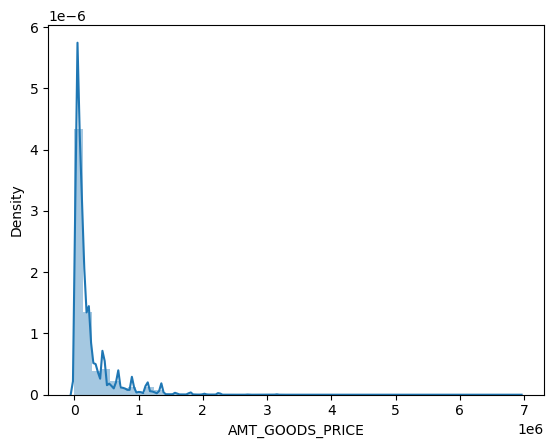

In [299]:
#Checking distribution of data 
sns.distplot(previous_application['AMT_GOODS_PRICE']);

### Observation :  As we can see all data skewed towards left side of graph and also there are few outliers as well so imputing mean with all null values is not good idea hence replacing null values with median values

In [300]:
# Imputing median with all null values of AMT_GOODS_PRICE column
previous_application['AMT_GOODS_PRICE'].fillna(value=previous_application['AMT_GOODS_PRICE'].median(), inplace=True)

In [301]:
# Checking basis statistical details of AMT_ANNUITY column 
previous_application['AMT_ANNUITY'].describe().round(3)

count    1297979.000
mean       15955.121
std        14782.137
min            0.000
25%         6321.780
50%        11250.000
75%        20658.420
max       418058.145
Name: AMT_ANNUITY, dtype: float64

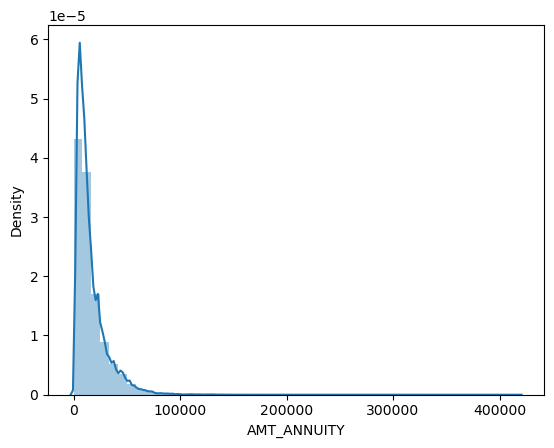

In [302]:
#Checking distribution of data 
sns.distplot(previous_application['AMT_ANNUITY']);

### Observation :  We can follow the same approach of AMT_GOODS_PRICE with AMT_ANNUITY column as data is skewed at left side of graph

In [303]:
# Imputing median with all null values of AMT_ANNUITY column
previous_application['AMT_ANNUITY'].fillna(value=previous_application['AMT_ANNUITY'].median(), inplace=True )

In [304]:
#Checking CNT_Payment column
previous_application['CNT_PAYMENT'].describe().round(3)

count    1297984.000
mean          16.054
std           14.567
min            0.000
25%            6.000
50%           12.000
75%           24.000
max           84.000
Name: CNT_PAYMENT, dtype: float64

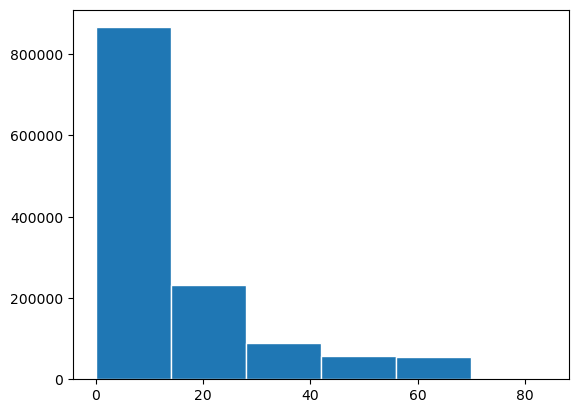

In [305]:
plt.hist(previous_application.CNT_PAYMENT, bins=6, edgecolor = 'white');

### As per understanding gain from column description CNT_Payment is dependant on contract NAME_CONTRACT_STATUS, reason behind that is if contarct status is not approved then there is NO chance of term period of that credit hence it will be null so here we can these value as 0 also as it will not cause any harm to our analysis.

In [306]:
# Let's check for 'NAME_CONTRACT_STATUS' where 'CNT_PAYMENT' value is NULL.
previous_application.loc[previous_application['CNT_PAYMENT'].isnull(), 'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

### As we can see from above results there is not as much contracts where credit term is null for approved contracts so our previous assumption is correct and we can replace that null values with ZERO

In [307]:
previous_application['CNT_PAYMENT'].fillna(value=0, inplace=True)

In [308]:
#Checking PRODUCT_COMBINATION column
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [309]:
# Total null values in Combinatoion Product column.
len(previous_application) - previous_application['PRODUCT_COMBINATION'].value_counts().sum()

346

### Here as we can see 'PRODUCT_COMBINATION' column is categorical value type and also the count of null values is comparatively very less hence we can simply replace this null values with mode which is 'Cash'  category

In [310]:
previous_application['PRODUCT_COMBINATION'].mode()[0]

'Cash'

In [311]:
# Replacing Null values with mode of 'PRODUCT_COMBINATION' coulmn
previous_application['PRODUCT_COMBINATION'].fillna(value=previous_application['PRODUCT_COMBINATION'].mode()[0], inplace=True)

In [312]:
# Checking null values of prevoius application data set
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int64

In [313]:
# There only 1 null value in 'AMT_credit' column hence we can simply igonre that or else we can replace that with median 
previous_application['AMT_CREDIT'].fillna(value=previous_application['AMT_CREDIT'].median(), inplace=True)

In [314]:
# Checking null values of prevoius application data set
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int64

<h2 style = "color : Brown"> Standardization of values </h2>

In [315]:
# Checking data types of all the columns of application_data
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [316]:
application_data['CNT_FAM_MEMBERS'].unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 9.0,
 7.0,
 8.0,
 10.0,
 13.0,
 14.0,
 12.0,
 20.0,
 15.0,
 16.0,
 11.0]

In [317]:
#Changing dtype of 'CNT_FAM_MEMBERS' column
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int)

In [318]:
application_data['CNT_FAM_MEMBERS'].unique().tolist()

[1, 2, 3, 4, 5, 6, 9, 7, 8, 10, 13, 14, 12, 20, 15, 16, 11]

In [319]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].unique().tolist()

[2.0,
 1.0,
 0.0,
 4.0,
 8.0,
 10.0,
 7.0,
 3.0,
 6.0,
 5.0,
 12.0,
 9.0,
 13.0,
 11.0,
 14.0,
 22.0,
 16.0,
 15.0,
 17.0,
 20.0,
 25.0,
 19.0,
 18.0,
 21.0,
 24.0,
 23.0,
 28.0,
 26.0,
 29.0,
 27.0,
 47.0,
 348.0,
 30.0]

In [320]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].unique().tolist()

[2.0, 0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 34.0, 8.0]

In [321]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].unique().tolist()

[2.0,
 1.0,
 0.0,
 4.0,
 8.0,
 10.0,
 7.0,
 3.0,
 6.0,
 5.0,
 12.0,
 9.0,
 13.0,
 11.0,
 14.0,
 21.0,
 15.0,
 22.0,
 16.0,
 20.0,
 25.0,
 17.0,
 19.0,
 18.0,
 24.0,
 23.0,
 28.0,
 29.0,
 27.0,
 47.0,
 344.0,
 30.0,
 26.0]

In [322]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].unique().tolist()

[2.0, 0.0, 1.0, 3.0, 5.0, 4.0, 7.0, 24.0, 6.0]

In [323]:
#Changing dtype of column to int dtype
application_data['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int)
application_data['DEF_30_CNT_SOCIAL_CIRCLE'] = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int)
application_data['OBS_60_CNT_SOCIAL_CIRCLE'] = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int)
application_data['DEF_60_CNT_SOCIAL_CIRCLE'] = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int)

In [324]:
# application_data['DAYS_LAST_PHONE_CHANGE'].unique().tolist()

In [325]:
print(application_data['DAYS_BIRTH'].unique().tolist()[:5])

[-9461, -16765, -19046, -19005, -19932]


In [326]:
print(application_data['DAYS_EMPLOYED'].unique().tolist()[:5])

[-637, -1188, -225, -3039, -3038]


In [327]:
print(application_data['DAYS_REGISTRATION'].unique().tolist()[:5])

[-3648.0, -1186.0, -4260.0, -9833.0, -4311.0]


In [328]:
print(application_data['DAYS_ID_PUBLISH'].unique().tolist()[:5])

[-2120, -291, -2531, -2437, -3458]


### As we can see columns which are providing previous days information are float data type and also days represent as negative days so we have to convert these negative days in positive values

In [329]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED'])
application_data['DAYS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [330]:
#Checking values after changing dtype and negative sign.
print(application_data['DAYS_REGISTRATION'].unique().tolist()[:5])

[3648.0, 1186.0, 4260.0, 9833.0, 4311.0]


In [331]:
print(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].unique().tolist())

[0.0, 1.0, 2.0, 3.0, 4.0]


In [332]:
#Checking values of number of enquires in hour, day, week, month, quarter and year span
print(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].unique().tolist())
print(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].unique().tolist())
print(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].unique().tolist())
print(application_data['AMT_REQ_CREDIT_BUREAU_MON'].unique().tolist())
print(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique().tolist())
print(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].unique().tolist())

[0.0, 1.0, 2.0, 3.0, 4.0]
[0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, 8.0]
[0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, 7.0]
[0.0, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, 4.0, 11.0, 8.0, 16.0, 12.0, 14.0, 10.0, 13.0, 17.0, 24.0, 19.0, 15.0, 23.0, 18.0, 27.0, 22.0]
[0.0, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, 7.0, 261.0, 19.0]
[1.0, 0.0, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, 9.0, 7.0, 10.0, 11.0, 13.0, 16.0, 12.0, 25.0, 23.0, 15.0, 14.0, 22.0, 17.0, 19.0, 18.0, 21.0, 20.0]


### As number of enquires should be in int format changing data type to int

In [333]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
application_data['AMT_REQ_CREDIT_BUREAU_DAY'] = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
application_data['AMT_REQ_CREDIT_BUREAU_MON'] = application_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

### Identifying numerical columns which can be convert categorical columns

#### Below colums can be convert into categorical column
1. AMT_INCOME_TOTAL
2. AMT_CREDIT - 
3. AMT_ANNUITY
4. AMT_GOODS_PRICE
5. DAYS_BIRTH
6. DAYS_EMPLOYED

In [334]:
application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307511.000000     3.075110e+05   
mean       1.687979e+05  5.990260e+05   27108.487841     5.383163e+05   
std        2.371231e+05  4.024908e+05   14493.461065     3.692890e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

          DAYS_BIRTH  DAYS_EMPLOYED  
count  307511.000000  307511.000000  
mean    16036.995067   67724.742149  
std      4363.988632  139443.751806  
min      7489.000000       0.000000  
25%     12413.000000     933.000000  
50%     15750.000000    2219.000000  
75%     19682.000000    5707.000000  
max     25229.000000  365243.000000

1. AMT_INCOME_TOTAL- Can be convert into range of income 
2. AMT_CREDIT - Can be convert into range of credit
3. AMT_ANNUITY - Can be convert into range of annuity
4. AMT_GOODS_PRICE- Can be convert into range of prices
5. DAYS_BIRTH - Can be convert into group of ages
6. DAYS_EMPLOYED - Can be convert into group of experience (0-3, 3-5, 5-10)

#### First we will be binning on AMT_INCOME_TOTAl column

In [335]:
# As values in e^5 we can simply divide by 100000 to convert it 

application_data['AMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL']/100000

#bining all income values into 11 parts
bins = [-1,1,2,3,4,5,6,7,8,9,10,1000]

ranges = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
application_data['INCOME_RANGE'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins, labels=ranges)

In [336]:
application_data.INCOME_RANGE.value_counts()

100K-200K    155898
200k-300k     65176
0-100K        63698
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
800k-900k       298
1M Above        249
700k-800k       162
900k-1M          28
Name: INCOME_RANGE, dtype: int64

In [337]:
# Viewing data after converting into categories
application_data[['AMT_INCOME_TOTAL','INCOME_RANGE']][:5]

AMT_INCOME_TOTAL INCOME_RANGE
0             2.025    200k-300k
1             2.700    200k-300k
2             0.675       0-100K
3             1.350    100K-200K
4             1.215    100K-200K

In [338]:
# Creating function to check percentage of categorical values in any column of data set
def percentage (data, x):
    return (data[x].value_counts(normalize=True)*100).round(2)

In [339]:
# Checking percentage of Income Range 
percentage(application_data,'INCOME_RANGE')

100K-200K    50.70
200k-300k    21.19
0-100K       20.71
300k-400k     4.77
400k-500k     1.74
500k-600k     0.36
600k-700k     0.28
800k-900k     0.10
1M Above      0.08
700k-800k     0.05
900k-1M       0.01
Name: INCOME_RANGE, dtype: float64

### Observation : 50% clients have income between 1-2 lakh

In [340]:
### let's binning of AMT_CREDIT column
#First will change make it in lakhs by dividing all values by 100000
application_data['AMT_CREDIT'] = application_data['AMT_CREDIT']/100000

In [341]:
#Now let make a bins and ranges for that bins
bins_01 = [-1,1,2,3,4,5,6,7,8,9,10,1000]

ranges_01 = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

application_data['CREDIT_RANGE'] = pd.cut(application_data['AMT_CREDIT'], bins_01, labels = ranges_01 )

In [342]:
# Viewing data after converting into categories
application_data[['AMT_CREDIT','CREDIT_RANGE']][:5]

AMT_CREDIT CREDIT_RANGE
0    4.065975    400k-500k
1   12.935025     1M Above
2    1.350000    100K-200K
3    3.126825    300k-400k
4    5.130000    500k-600k

In [343]:
# Checking percentage of Credit range
percentage(application_data,'CREDIT_RANGE')

200k-300k    17.82
1M Above     16.25
500k-600k    11.13
400k-500k    10.42
100K-200K     9.80
300k-400k     8.56
600k-700k     7.82
800k-900k     7.09
700k-800k     6.24
900k-1M       2.90
0-100K        1.95
Name: CREDIT_RANGE, dtype: float64

### Observation : As we can see here, 16.25% clients have taken more 1M credit and 17.82% clients have taken credit ranges between 2-3 Lacs

In [344]:
### let's binning of AMT_ANNUITY column
application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY']/10000

In [345]:
#Now let make a bins and ranges for that bins
bins_02 = [-1,1,2,3,4,5,1000]

ranges_02 = ['0-10K','10K-20K', '20k-30k','30k-40k','40k-50k','50K Above']

application_data['ANNUITY_RANGE'] = pd.cut(application_data['AMT_ANNUITY'], bins_02, labels = ranges_02 )

In [346]:
# Viewing data after converting into categories
application_data[['AMT_ANNUITY','ANNUITY_RANGE']][:5]

AMT_ANNUITY ANNUITY_RANGE
0      2.47005       20k-30k
1      3.56985       30k-40k
2      0.67500         0-10K
3      2.96865       20k-30k
4      2.18655       20k-30k

In [347]:
# Checking % of annuity range 
percentage(application_data,'ANNUITY_RANGE')

20k-30k      30.07
10K-20K      27.06
30k-40k      19.04
40k-50k       9.32
0-10K         7.57
50K Above     6.93
Name: ANNUITY_RANGE, dtype: float64

### Observation : More than 30% clients have annutiy amount ranges between 20K-30K

In [348]:
### let's binning of AMT_GOODS_PRICE column 
application_data['AMT_GOODS_PRICE'] = application_data['AMT_GOODS_PRICE'] / 100000

In [349]:
#Now let make a bins and ranges for that bins
bins_03 = [-1,1,2,3,4,5,6,7,8,9,10,1000]

ranges_03 = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

application_data['GOOD_PRICE_RANGE'] = pd.cut(application_data['AMT_GOODS_PRICE'], bins_03, labels = ranges_03 )

In [350]:
# Viewing data after converting into categories
application_data[['AMT_GOODS_PRICE','GOOD_PRICE_RANGE']][:5]

AMT_GOODS_PRICE GOOD_PRICE_RANGE
0            3.510        300k-400k
1           11.295         1M Above
2            1.350        100K-200K
3            2.970        200k-300k
4            5.130        500k-600k

In [351]:
percentage(application_data,'GOOD_PRICE_RANGE')

200k-300k    20.41
400k-500k    18.62
600k-700k    13.02
1M Above     11.10
100K-200K    10.72
800k-900k     6.99
300k-400k     6.90
500k-600k     4.27
0-100K        2.83
700k-800k     2.64
900k-1M       2.52
Name: GOOD_PRICE_RANGE, dtype: float64

### Observation : 11.10 % clients taking this credit to buy 1M above price goods 

In [352]:
### let's binning of DAYS_BIRTH column 
application_data['AGE'] = application_data['DAYS_BIRTH'] // 365

In [353]:
#Now let make a bins and ranges for that bins
bins_03 = [0,20,30,40,50,60,1000]

ranges_03 = ['0-20','20-30','30-40','40-50','50-60','60 Above']

application_data['AGE_GROUP'] = pd.cut(application_data['AGE'], bins_03, labels = ranges_03 )

In [354]:
# Viewing data after converting into categories
application_data[['AGE','AGE_GROUP']][:5]

AGE AGE_GROUP
0   25     20-30
1   45     40-50
2   52     50-60
3   52     50-60
4   54     50-60

In [355]:
# Checking % of age groups
percentage(application_data,'AGE_GROUP')

30-40       27.03
40-50       24.19
50-60       22.05
20-30       17.17
60 Above     9.55
0-20         0.00
Name: AGE_GROUP, dtype: float64

### Observation : 75 % of clients age ranges between 30 - 60 years

In [356]:
### let's binning of DAYS_EMPLOYED column 
application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED'] // 365

In [357]:
#Now let make a bins and ranges for that bins
bins_04 = [-1,5,10,15,20,30,40,50,60,1000]
ranges_04 = ['0-5','5-10','10-15','15-20','20-30','30-40','40-50','50-60','60 above']

application_data['EMPLOYED_YEARS_RANGE']=pd.cut(application_data['YEARS_EMPLOYED'], bins_04, labels = ranges_04 )

In [358]:
# Viewing data after converting into categories
application_data[['YEARS_EMPLOYED','EMPLOYED_YEARS_RANGE']][:5]

YEARS_EMPLOYED EMPLOYED_YEARS_RANGE
0               1                  0-5
1               3                  0-5
2               0                  0-5
3               8                 5-10
4               8                 5-10

In [359]:
# Checking % of current employement years
percentage(application_data,'EMPLOYED_YEARS_RANGE')

0-5         49.60
5-10        18.21
60 above    18.01
10-15        7.46
15-20        3.16
20-30        2.73
30-40        0.77
40-50        0.06
50-60        0.00
Name: EMPLOYED_YEARS_RANGE, dtype: float64

### Observation : Almost 45 % clients having 0-5 years in his/her current employment

In [360]:
# Checking data types of all the columns of previous_applications dataset
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_DOWN_PAYMENT             1670214 non-null  float64
 7   AMT_GOODS_PRICE              1670214 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            1670214 non-n

In [361]:
previous_application['CNT_PAYMENT'].unique().tolist()[:10]

[12.0, 36.0, 24.0, 18.0, 0.0, 54.0, 30.0, 8.0, 3.0, 6.0]

In [362]:
# Changing dtype of CNT_PAYMENT to int
previous_application['CNT_PAYMENT'] = previous_application['CNT_PAYMENT'].astype(int)

In [363]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

-1.0    673065
 0.0    665527
 1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [364]:
# Changing dtype of NFLAG_INSURED_ON_APPROVAL to int
previous_application['NFLAG_INSURED_ON_APPROVAL'] = previous_application['NFLAG_INSURED_ON_APPROVAL'].astype(int)

In [365]:
# Checking basic statistical values of days decision column
previous_application['DAYS_DECISION'].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [366]:
# Converting negative days to positive ones
previous_application['DAYS_DECISION'] = abs( previous_application['DAYS_DECISION'] )

In [367]:
# Checking basic statistical values of previous application data set
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670214e+06      1.670214e+06     1.670214e+06   
mean   1.961140e+05      3.983717e+03     2.011815e+05   
std    3.185745e+05      1.446730e+04     2.808629e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      1.638000e+03     6.750000e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      1.638000e+03     1.804050e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06       1.670214e+06   
mean              1.248418e+01            9.964675e-01       6.460158e-02   
std               3.334028e+00            5.932963e-02       7.473662e-02   
min               0.000000e+00            0.000000e+00      -1.497876e-05   
25%               1.000000e+01            1.000000e+00       5.160508e-02   
50%               1.200000e+01            1.000000e+00       5.160508e-02   
75%               1.500000e+01            1.000000e+00       5.160508e-02   
max               2.300000e+01            1.000000e+00       1.000000e+00   

       DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count   1.670214e+06      1.670214e+06  1.670214e+06   
mean    8.806797e+02      3.139511e+02  1.247621e+01   
std     7.790997e+02      7.127443e+03  1.447588e+01   
min     1.000000e+00     -1.000000e+00  0.000000e+00   
25%     2.800000e+02     -1.000000e+00  0.000000e+00   
50%     5.810000e+02      3.000000e+00  1.000000e+01   
75%     1.300000e+03      8.200000e+01  1.600000e+01   
max     2.922000e+03      4.000000e+06  8.400000e+01   

       NFLAG_INSURED_ON_APPROVAL  
count               1.670214e+06  
mean               -2.044307e-01  
std                 7.481580e-01  
min                -1.000000e+00  
25%                -1.000000e+00  
50%                 0.000000e+00  
75%                 0.000000e+00  
max                 1.000000e+00

### Identifying numerical columns which can be convert categorical columns

#### Below are the columns which can be converted to categorical columns

1. AMT_APPLICATION
2. AMT_CREDIT
3. AMT_DOWN_PAYMENT
4. AMT_GOODS_PRICE
5. DAYS_DECISION

In [368]:
#Checking basis statistical values of AMT_APPLICATION
previous_application.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [369]:
# let binning of AMT_APPLICATION columns
previous_application['AMT_APPLICATION'] = previous_application['AMT_APPLICATION'] / 100000

In [370]:
#Now let make a bins and ranges for that bins
bins_05 = [-1,1,2,3,4,5,6,7,8,9,10,1000]
ranges_05 = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

previous_application['AMT_APPLICATION_RANGE'] = pd.cut(previous_application['AMT_APPLICATION'], bins_05, labels = ranges_05 )

In [371]:
# Viewing AMT_APPLICATION_RANGE after binning
previous_application[['AMT_APPLICATION','AMT_APPLICATION_RANGE']][:5]

AMT_APPLICATION AMT_APPLICATION_RANGE
0          0.17145                0-100K
1          6.07500             600k-700k
2          1.12500             100K-200K
3          4.50000             400k-500k
4          3.37500             300k-400k

In [372]:
# Checking percentage of AMT_APPLICATION_RANGE 
percentage(previous_application, 'AMT_APPLICATION_RANGE')

0-100K       59.16
100K-200K    16.88
200k-300k     7.94
400k-500k     4.20
1M Above      3.15
300k-400k     3.06
600k-700k     1.92
800k-900k     1.43
500k-600k     1.15
700k-800k     0.72
900k-1M       0.39
Name: AMT_APPLICATION_RANGE, dtype: float64

### Observation : Almost 47% client had applied upto 1 lakh credit only.

In [373]:
#Checking basis statistical values of AMT_APPLICATION
previous_application.AMT_CREDIT.describe()

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [374]:
# let binning of AMT_APPLICATION columns
previous_application['AMT_CREDIT'] = previous_application['AMT_CREDIT'] / 100000

In [375]:
#Now let make a bins and ranges for that bins
bins_06 = [-1,1,2,3,4,5,6,7,8,9,10,1000]
ranges_06 = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

previous_application['AMT_CREDIT_RANGE'] = pd.cut(previous_application['AMT_CREDIT'], bins_06, labels = ranges_06 )

In [376]:
# Viewing AMT_APPLICATION_RANGE after binning
previous_application[['AMT_CREDIT','AMT_CREDIT_RANGE']][:5]

AMT_CREDIT AMT_CREDIT_RANGE
0    0.171450           0-100K
1    6.796710        600k-700k
2    1.364445        100K-200K
3    4.707900        400k-500k
4    4.040550        400k-500k

In [377]:
# Checking percentage of AMT_APPLICATION_RANGE 
percentage(previous_application, 'AMT_CREDIT_RANGE')

0-100K       56.09
100K-200K    17.67
200k-300k     8.24
1M Above      3.80
400k-500k     3.69
300k-400k     3.43
500k-600k     2.31
700k-800k     1.58
600k-700k     1.33
800k-900k     1.27
900k-1M       0.60
Name: AMT_CREDIT_RANGE, dtype: float64

### Observation : There is not much difference in clients application amount and client approved credit amount

In [378]:
#Checking basis statistical values of AMT_DOWN_PAYMENT
previous_application.AMT_DOWN_PAYMENT.describe()

count    1.670214e+06
mean     3.983717e+03
std      1.446730e+04
min     -9.000000e-01
25%      1.638000e+03
50%      1.638000e+03
75%      1.638000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

### Observation : almost 75% values are below 1638 hence there is no point in bucketing here

In [379]:
#Checking basis statistical values of AMT_GOODS_PRICE
previous_application.AMT_GOODS_PRICE.describe()

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [380]:
# let binning of AMT_GOODS_PRICE columns
previous_application['AMT_GOODS_PRICE'] = previous_application['AMT_GOODS_PRICE'] / 100000

In [381]:
#Now let make a bins and ranges for that bins
bins_07 = [-1,1,2,3,4,5,6,7,8,9,10,1000]
ranges_07 = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

previous_application['GOODS_PRICE_RANGE'] = pd.cut(previous_application['AMT_GOODS_PRICE'], bins_07, labels = ranges_07 )

In [382]:
# Viewing GOODS_PRICE_RANGE after binning
previous_application[['AMT_GOODS_PRICE','GOODS_PRICE_RANGE']][:5]

AMT_GOODS_PRICE GOODS_PRICE_RANGE
0          0.17145            0-100K
1          6.07500         600k-700k
2          1.12500         100K-200K
3          4.50000         400k-500k
4          3.37500         300k-400k

In [383]:
# Checking percentage of AMT_APPLICATION_RANGE 
percentage(previous_application, 'GOODS_PRICE_RANGE')

100K-200K    39.96
0-100K       36.08
200k-300k     7.94
400k-500k     4.20
1M Above      3.15
300k-400k     3.06
600k-700k     1.92
800k-900k     1.43
500k-600k     1.15
700k-800k     0.73
900k-1M       0.39
Name: GOODS_PRICE_RANGE, dtype: float64

### Observation : 75% clients having good prices ranges between 0 to 200K

In [384]:
# let binning for age descision column
previous_application['DAYS_DECISION'].describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [385]:
# Lets binning of day decision column
bins_08 = [-1,500,1000,1500,2000,2500,3000,10000]
ranges_08 = ['0-500_Days','500-1000_Days','1000-1500_Days','1500-2000_Days','2000-2500_Days','2500-3000_Days','Above 3000_Days']

previous_application['PREVIOUS_DECISION_RANGE'] = pd.cut(previous_application['DAYS_DECISION'], bins_08, labels=ranges_08 )

In [386]:
# Viewing DAYS_DECISION after binning
previous_application[['DAYS_DECISION','PREVIOUS_DECISION_RANGE']][:5]

DAYS_DECISION PREVIOUS_DECISION_RANGE
0             73              0-500_Days
1            164              0-500_Days
2            301              0-500_Days
3            512           500-1000_Days
4            781           500-1000_Days

In [387]:
# Checking percentage of PREVIOUS_DECISION_RANGE 
percentage(previous_application, 'PREVIOUS_DECISION_RANGE')

0-500_Days         45.11
500-1000_Days      22.35
1000-1500_Days     11.48
1500-2000_Days      7.65
2000-2500_Days      7.39
2500-3000_Days      6.01
Above 3000_Days     0.00
Name: PREVIOUS_DECISION_RANGE, dtype: float64

### Observation : almost 45% clients applied again for credit within 1.5 year 

<h2 style = 'color : Brown'> Outliers identification </h2>

In [388]:
# Finding outliers in numerical columns of application data set
appl_Cont_Colm = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

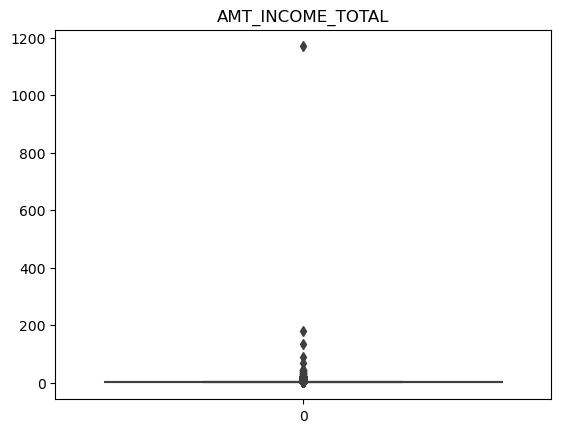

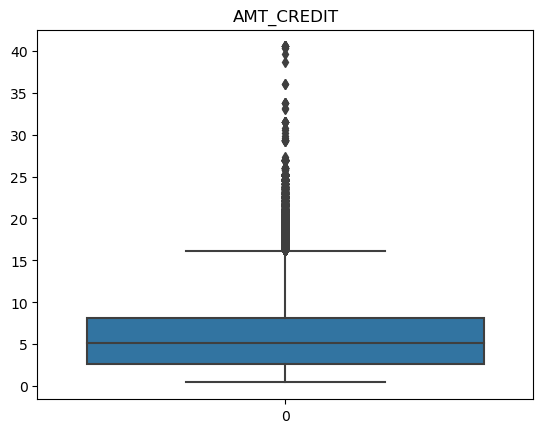

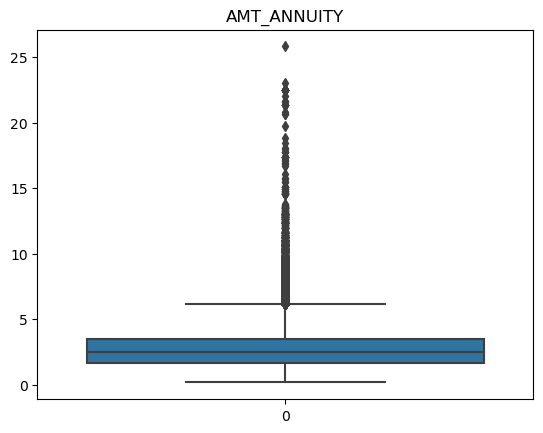

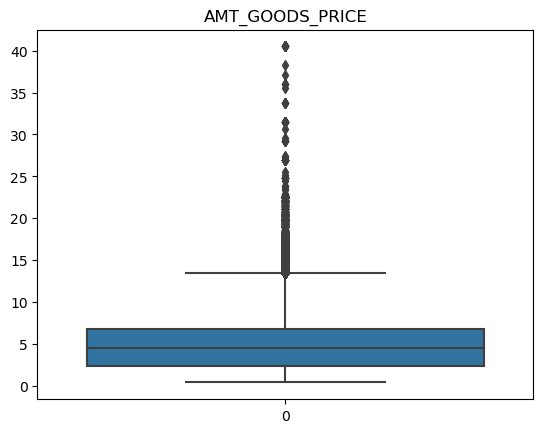

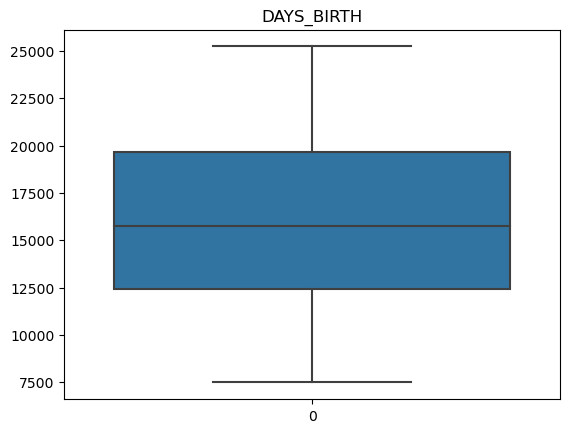

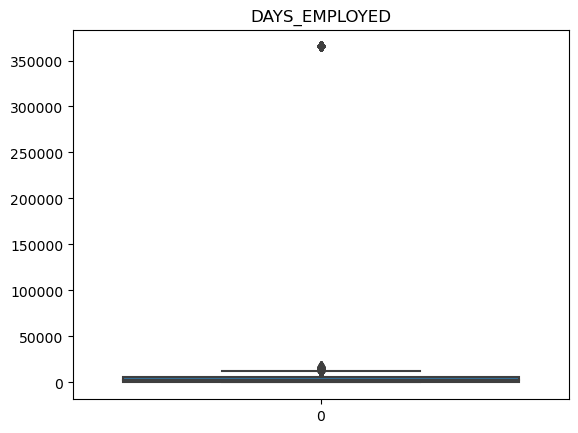

In [389]:
for i in appl_Cont_Colm:
    sns.boxplot(application_data[i]);
    plt.title(i)
    plt.show()

In [390]:
application_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].describe()

AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count     307511.000000  307511.000000  307511.000000    307511.000000   
mean           1.687979       5.990260       2.710849         5.383163   
std            2.371231       4.024908       1.449346         3.692890   
min            0.256500       0.450000       0.161550         0.405000   
25%            1.125000       2.700000       1.652400         2.385000   
50%            1.471500       5.135310       2.490300         4.500000   
75%            2.025000       8.086500       3.459600         6.795000   
max         1170.000000      40.500000      25.802550        40.500000   

          DAYS_BIRTH  DAYS_EMPLOYED  
count  307511.000000  307511.000000  
mean    16036.995067   67724.742149  
std      4363.988632  139443.751806  
min      7489.000000       0.000000  
25%     12413.000000     933.000000  
50%     15750.000000    2219.000000  
75%     19682.000000    5707.000000  
max     25229.000000  365243.000000

### Insights gain after visualization of above columns of applications_data

- __AMT_INCOME_TOTAL__ : 75 % clients having total income below 2 lakh and there few clients which has high income compared to other clients
- __AMT_CREDIT__ : As we can there is no outliers in this column as values are in continuous  even after upper fence
- __AMT_ANNUITY & AMT_GOODS_PRICE__ : There are no ouliers for these column as well
- __DAYS_BIRTH__ : There are values which are above upper fence of box hence this column data is more reliable
- __DAYS_EMPLOYED__ : There is some record which are marked at 350000 which is around 1000 years which is not practical at all. 
                      those are wrong enteries in these columns

In [391]:
# Finding outliers in numerical columns of previous-application data set
prev_cont_colm = ['AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','DAYS_DECISION']

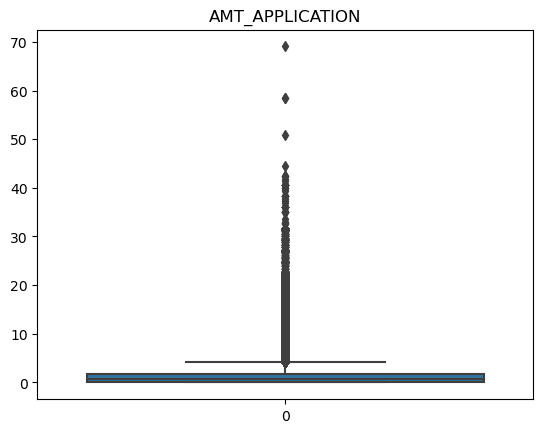

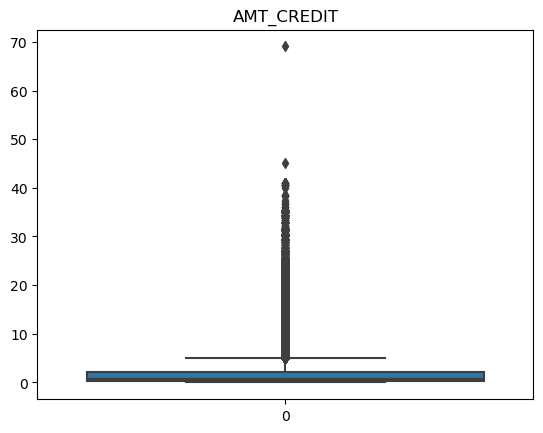

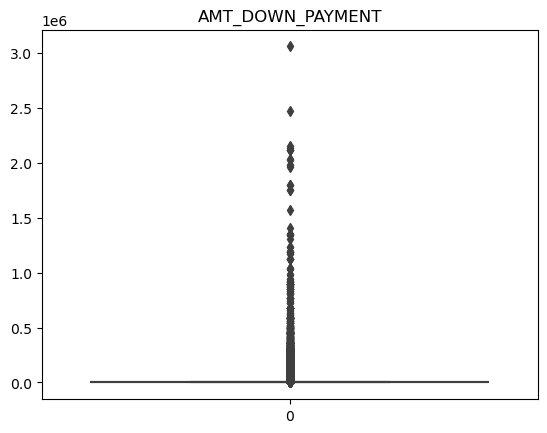

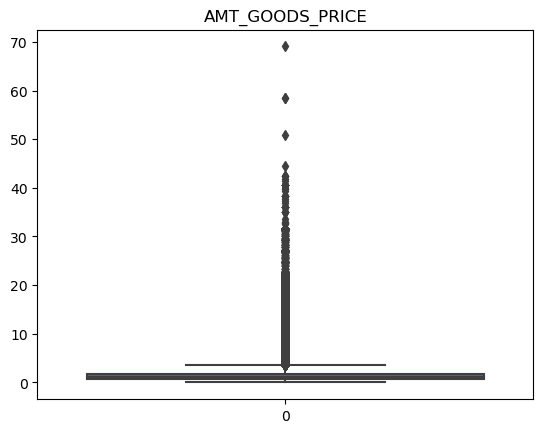

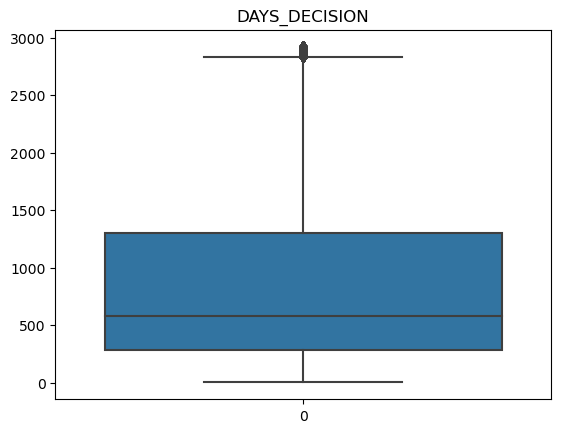

In [392]:
for i in prev_cont_colm:
    sns.boxplot(previous_application[i]);
    plt.title(i);
    plt.show()

In [393]:
# Checking basis statistical values of previous applications
(previous_application[['AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','DAYS_DECISION']].describe()).round(2)

AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count       1670214.00  1670214.00        1670214.00       1670214.00   
mean              1.75        1.96           3983.72             2.01   
std               2.93        3.19          14467.30             2.81   
min               0.00        0.00             -0.90             0.00   
25%               0.19        0.24           1638.00             0.68   
50%               0.71        0.81           1638.00             1.12   
75%               1.80        2.16           1638.00             1.80   
max              69.05       69.05        3060045.00            69.05   

       DAYS_DECISION  
count     1670214.00  
mean          880.68  
std           779.10  
min             1.00  
25%           280.00  
50%           581.00  
75%          1300.00  
max          2922.00

### Insights gain after visualization of above columns of previous applications data

- __AMT_APPLICATION & AMT_CREDIT & AMT_GOODS_PRICE__ : There are few potential outlier present in this column.
- __AMT_DOWN_PAYMENT__ : There are few outliers present in this column as well.
- __DAYS_DECISION__ : There are no as such outlier in this column

<h2 Style='color : brown'> Handling of outliers </h2>

#### Handling outliers of application data set

In [394]:
#Checking Days employed for above 22000 days which was wrong entries as retirement age is 60
application_data[ application_data['DAYS_EMPLOYED'] > 22000].shape

(55374, 61)

In [395]:
# Dropping records where days employed are greater than 20000 days which is around 60 years
application_data = application_data [ ~(application_data['DAYS_EMPLOYED'] > 22000) ]

In [396]:
# Handling outliers of AMT_INCOME_TOTAL column of application data set

In [397]:
#Checking AMT_INCOME_TOTAL for above 50 lakh  which is extreme high values and may affect our analysis.
application_data[ application_data['AMT_INCOME_TOTAL'] > 50 ].shape

(5, 61)

In [398]:
application_data[ application_data['AMT_INCOME_TOTAL'] > 50 ][:10]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
77768       190160       0         Cash loans           F            Y   
131127      252084       0         Cash loans           M            Y   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1         1170.0000    5.624910   
77768                N             0           90.0000   14.315310   
131127               N             0           67.5000    7.908300   
203693               Y             2          180.0009    6.750000   
246858               Y             0          135.0000   14.005035   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840       2.61945            4.545   Unaccompanied               Working   
77768      13.26015           13.770   Unaccompanied               Working   
131127      5.29785            6.750   Unaccompanied               Working   
203693      6.92955            6.750   Unaccompanied  Commercial associate   
246858     13.09455           13.680   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special            Married  House / apartment   
77768                Higher education     Civil marriage  House / apartment   
131127               Higher education            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643       12615            922   
77768                     0.010147       16425           8476   
131127                    0.009549       19341            443   
203693                    0.030755       15704           4961   
246858                    0.030755       13551            280   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840              6762.0             3643           1               1   
77768              7276.0             1656           1               1   
131127             7414.0             2886           1               1   
203693             3338.0             4728           1               1   
246858             3953.0             4972           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                 0                 1           0           0   
77768                 0                 1           0           0   
131127                1                 1           1           0   
203693                0                 1           0           0   
246858                1                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840         Laborers                3                     2   
77768         Managers                2                     2   
131127        Laborers                2                     2   
203693         Missing                4                     2   
246858         Missing                2                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                             2                    TUESDAY   
77768                             2                     FRIDAY   
131127                            2                    TUESDAY   
203693                            2                   THURSDAY   
246858                            2                     SUNDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                        14                           0   
77768                        13  

In [399]:
# Dropping records where AMT_INCOME_TOTAL are greater than 50 lakh  which is extreme high values and may affect our analysis.
application_data = application_data [ ~(application_data['AMT_INCOME_TOTAL'] > 50) ]

<h2 Style='color : brown'> DATA ANALYSIS </h2>

In [400]:
# Checking DATA Imbalance in TARGET Variable

In [401]:
application_data["TARGET"].value_counts().reset_index()

index  TARGET
0      0  230298
1      1   21834

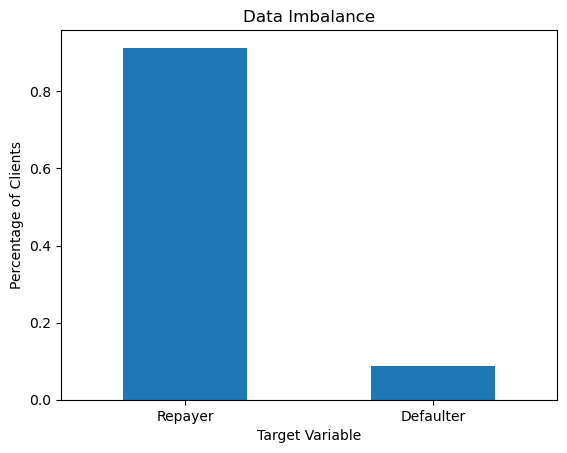

In [402]:
application_data["TARGET"].value_counts(normalize=True).reset_index()['TARGET'].plot.bar()
plt.title('Data Imbalance')
plt.xlabel('Target Variable')
plt.ylabel('Percentage of Clients')
plt.xticks((0,1),['Repayer','Defaulter'], rotation=0)
plt.show()

In [403]:
## Spliting application data set on basis of target variable

Repayer   = application_data[ application_data['TARGET'] == 0 ]
Defaulter = application_data[ application_data['TARGET'] == 1 ]

# Percentage of data imbalace in target variable :
print('Repayer % = ', round(len(Repayer)*100 / len(application_data),2) )
print('Defaulter % = ', round(len(Defaulter)*100 / len(application_data),2) )

Repayer % =  91.34
Defaulter % =  8.66


<h2 Style='color : Green'> Univariate Analysis </h2>

### Checking count distribution of continous variables using histogram

In [404]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [405]:
# Defining seperate list of continous columns in application_data
appl_cont_Colm_01 = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED',
 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
    'FLAG_EMAIL','CNT_FAM_MEMBERS']

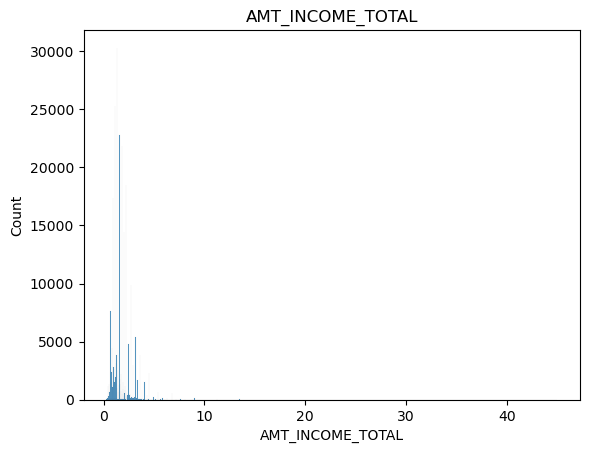

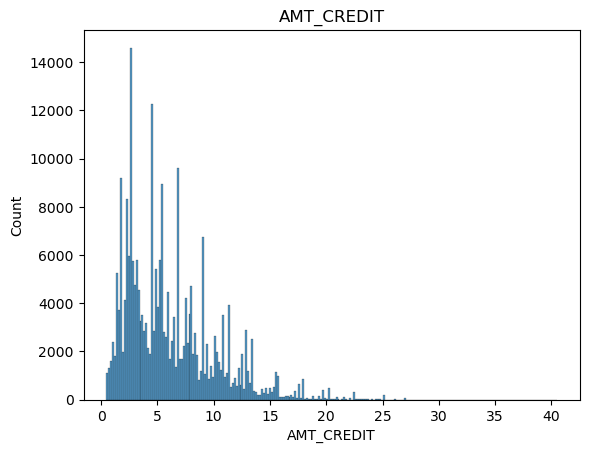

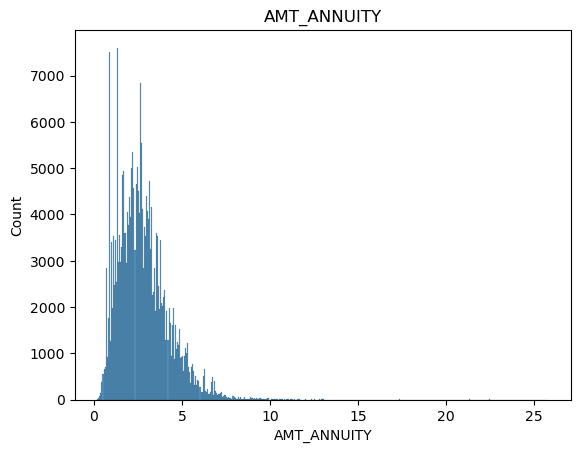

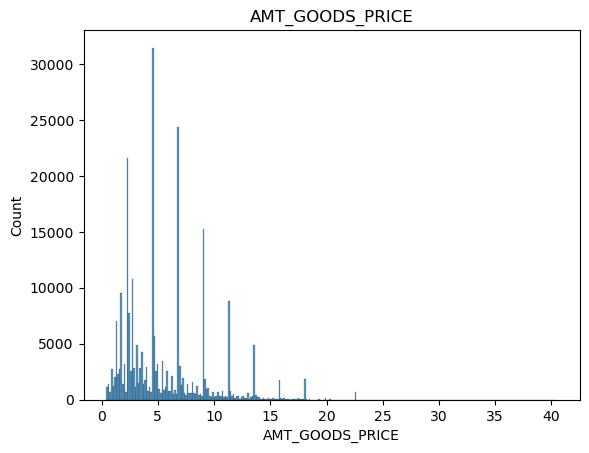

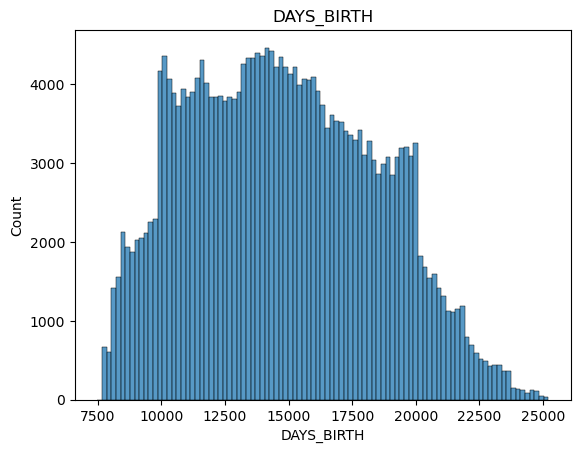

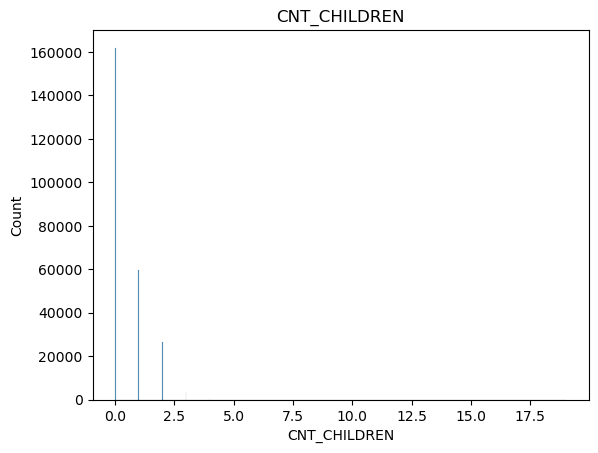

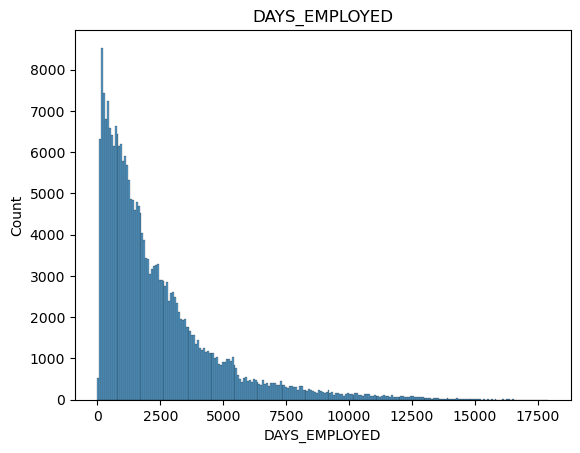

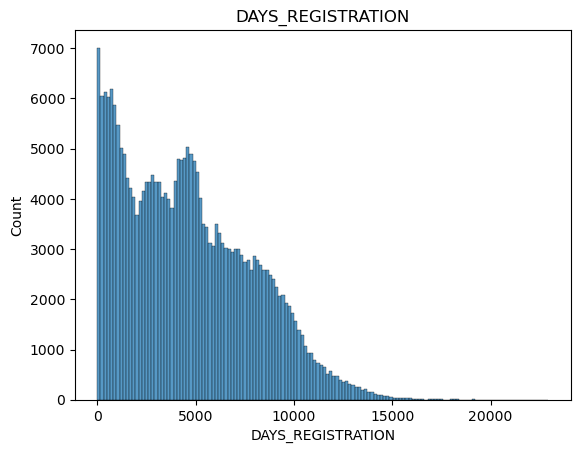

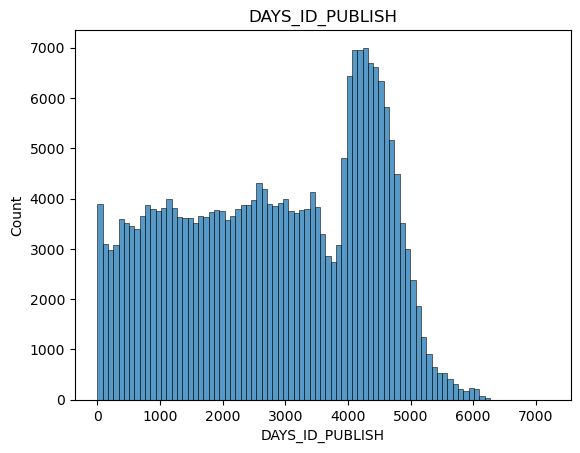

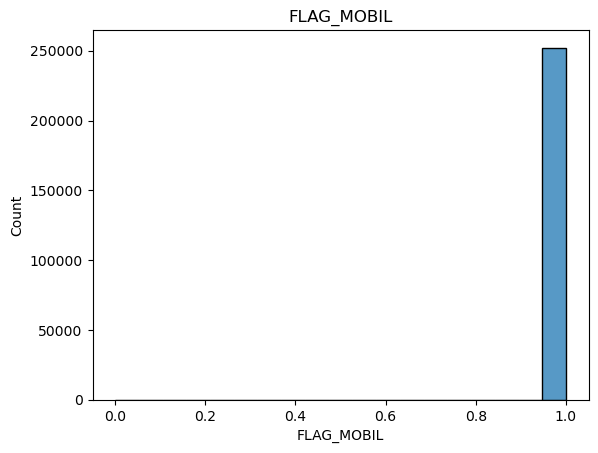

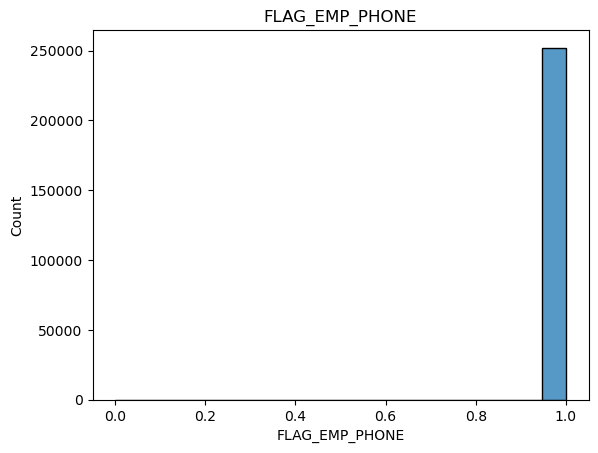

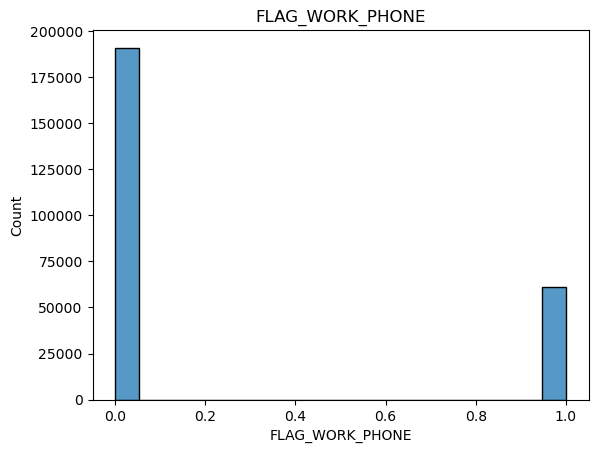

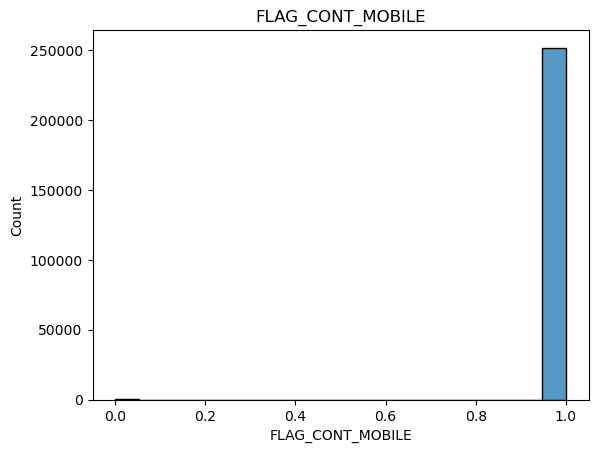

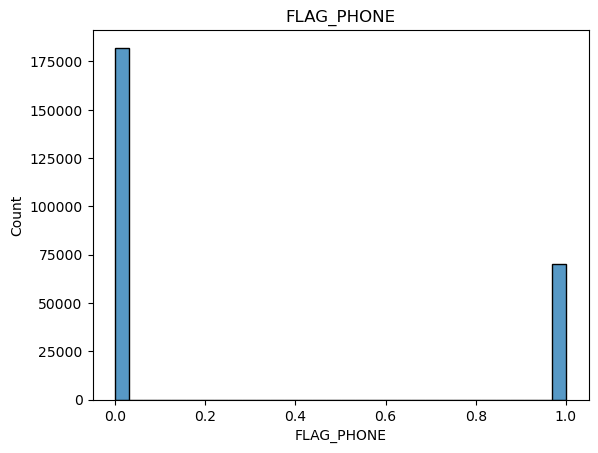

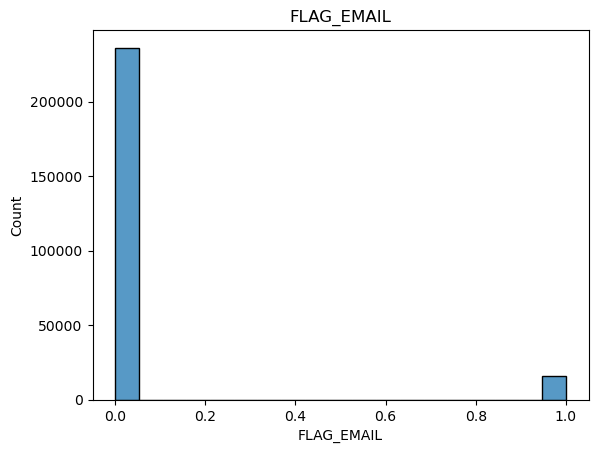

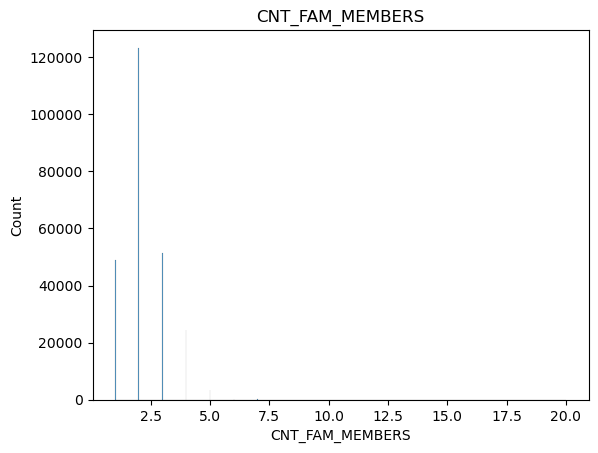

In [406]:
# Checking all continous columns using histplot to check distribution of data

for i in appl_cont_Colm_01:
    sns.histplot(application_data[i])   
    plt.title(i)
    plt.show()


### Observations : 
1. AMT_INCOME_TOTAL : Maximum clients having total income between 1-2 lakh
2. AMT_CREDIT       : Maximum clients having credit amount in between 2-5 lakh
3. AMT_ANNUITY      : Maximum data is skewed at left side of the graph.
4. AMT_GOODS PRICE  : Highest amount good price is around 5 lakh followed by 7 lakh.
5. DAYS_BIRTH       : Maximum clients having age in days from 10,000 to 20,000
6. CNT_CHILDREN     : All clients who are applying for credit having only 1 or 2 childrens
7. DAYS EMPLOYED    : Highest number of clients having 0-500 days in current employement
8. DAYS_REGISTRATION: Highest number of clients changed their registration 0-100 days before application.
9. DAYS_ID_PUBLISH  : Maximum number of clients didn't changed their identity in last 4000- 5000 days which is 10-13 years.
10. FLAG_MOB        : Almost all Clients have provided their mobile phone number
11. FLAG_EMP_PHONE  : Almost all Clients have provided their employer phone number
12. FLAG_WORK_PHONE : Around 60000 clients doesnot provided their work contact number
13. FLAG_CONT_MOBILE: Except few clients,Maximum clients mobile number is reachable.
14. FLAG_PHONE      : Around 1,80,000 clients provided their home phone number and 70,000 didn't provided 
15. FLAG_EMAIL      : MAximum clients have provided their EMAIL 
16. CNT_FAM_MEMBERS : All clients having 1-3 family members.


In [407]:
# Defining seperate list of continous columns in application_data
appl_cont_Colm_02 = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

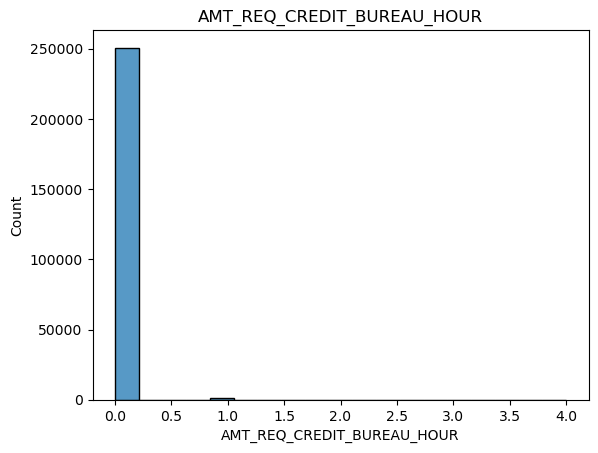

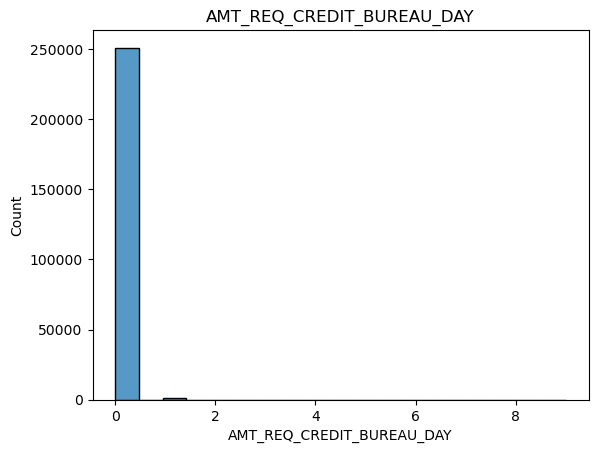

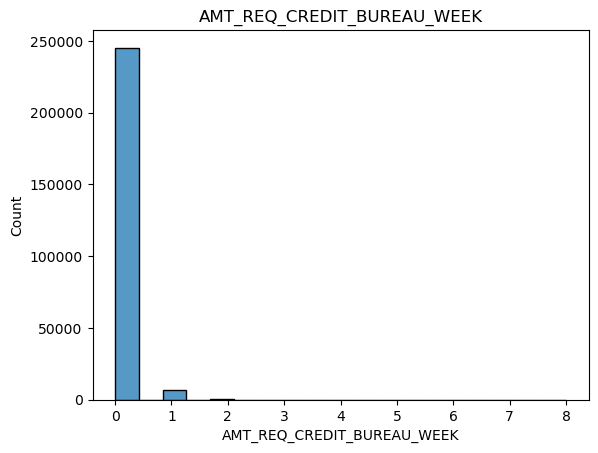

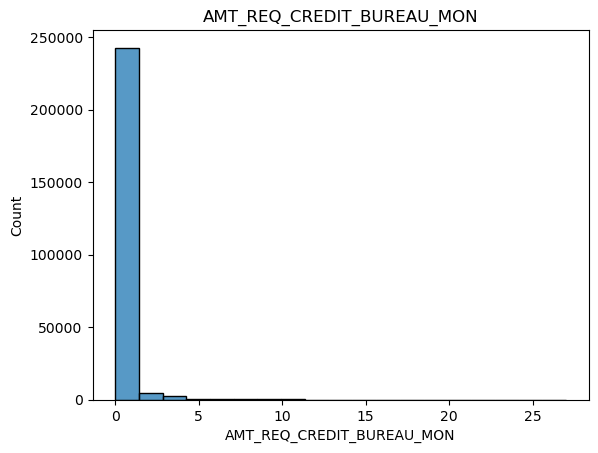

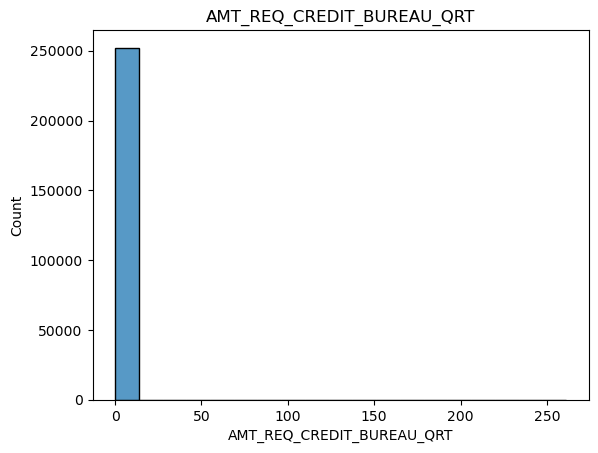

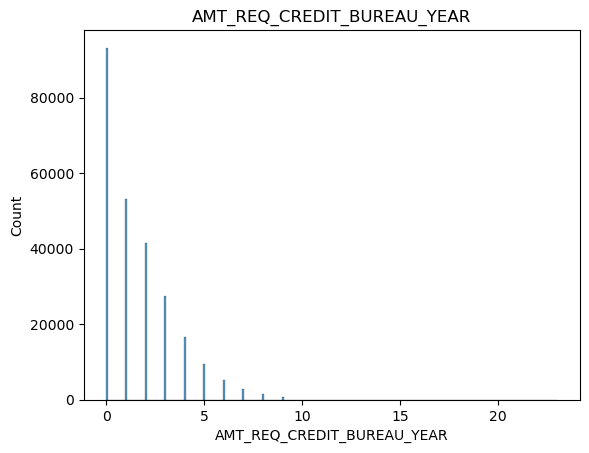

In [408]:
# Checking all continous columns using histplot to check distribution of data

for i in appl_cont_Colm_02:
    sns.histplot(application_data[i])   
    plt.title(i)
    plt.show()

### Observations : 
1. Maximum clients having almost 0 enquires to credit bureau in hour, day , week span before application
2. Around 2,15,000 clients having 0 enquires to credit bureau one month before application
3. Around 2,12,000 clients having 0 enquires to credit bureau 3 month before application
4. 90,000 clients having enquires to credit bureau in one year (excluding last 3 months before application)

### Categorical unordered univariate analysis 

In [409]:
app_cat_Colm = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

In [410]:
# Definning function to plot bar plot of percentage of Categorical variable

def Univariate_cat(data, column):
    
    (data[column].value_counts(normalize=True)).plot.bar();
    plt.title("Distribution of "+ column.title() + " Variable")
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('% of clients')
    plt.show()

F    62.34
M    37.66
Name: CODE_GENDER, dtype: float64


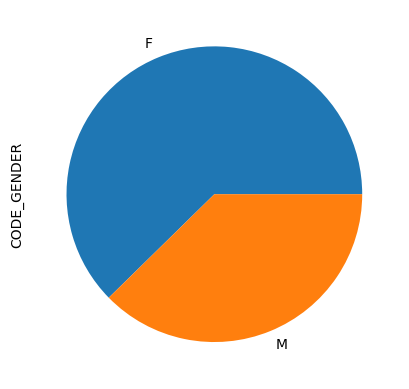

In [411]:
# plotting pie chart of percentage of CODE_GENDER category
print(round(application_data['CODE_GENDER'].value_counts(normalize=True)*100,2))
(application_data['CODE_GENDER'].value_counts(normalize=True)).plot.pie();

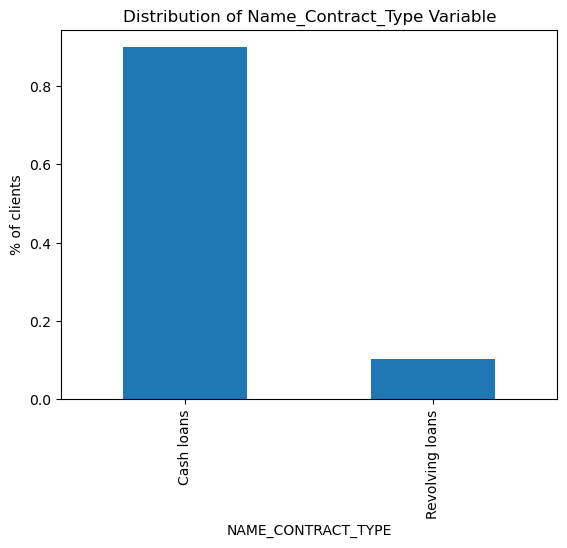

In [412]:
Univariate_cat(application_data,'NAME_CONTRACT_TYPE')

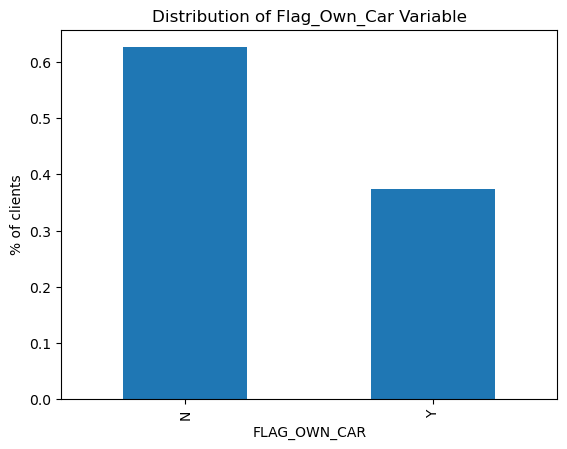

In [413]:
Univariate_cat(application_data,'FLAG_OWN_CAR')

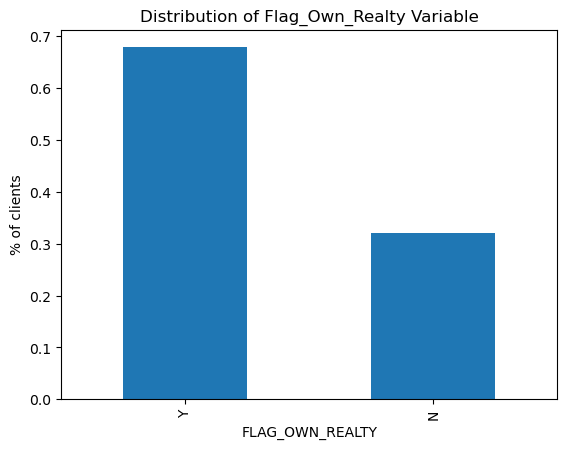

In [414]:
Univariate_cat(application_data,'FLAG_OWN_REALTY')

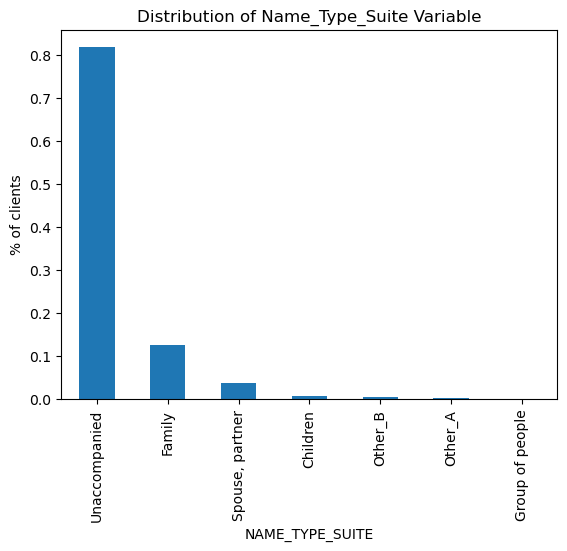

In [415]:
Univariate_cat(application_data,'NAME_TYPE_SUITE')

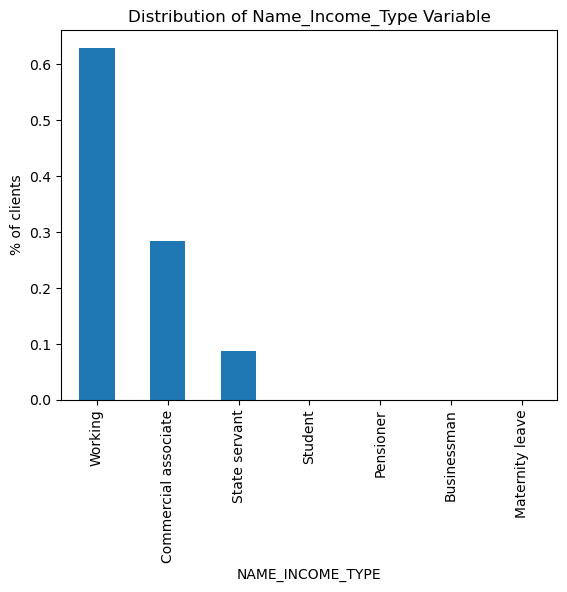

In [416]:
Univariate_cat(application_data,'NAME_INCOME_TYPE')

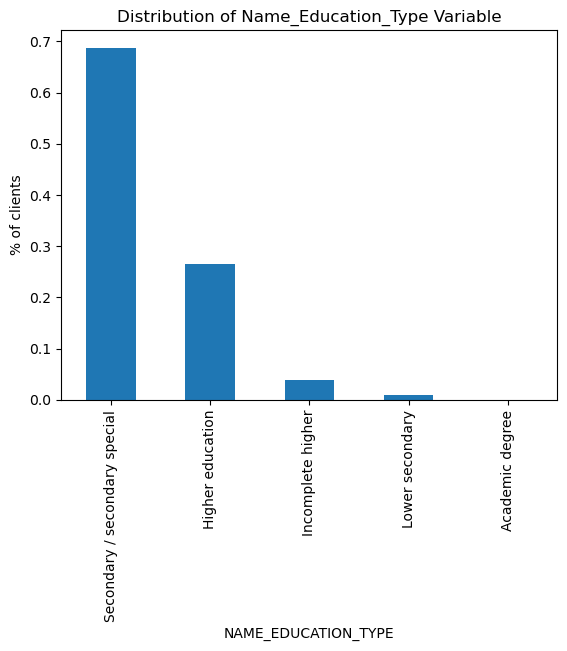

In [417]:
Univariate_cat(application_data,'NAME_EDUCATION_TYPE')

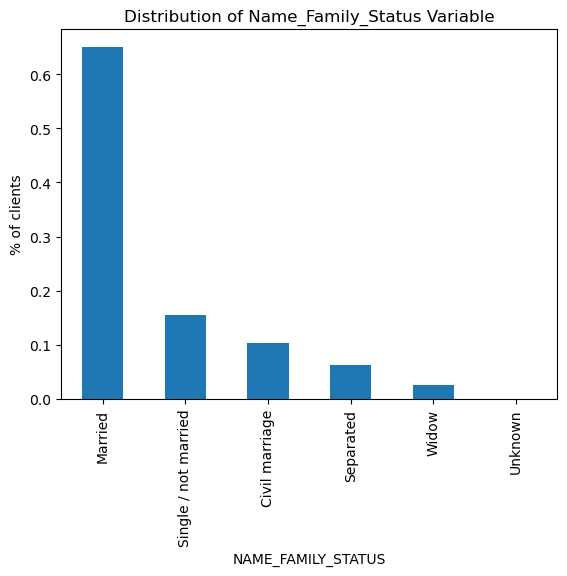

In [418]:
Univariate_cat(application_data,'NAME_FAMILY_STATUS')

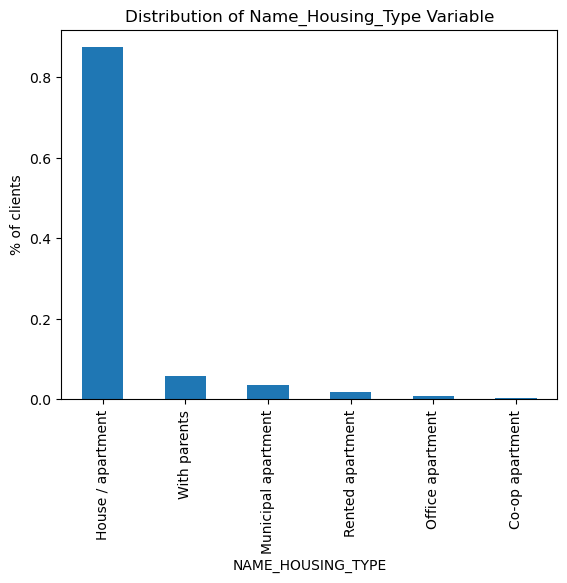

In [419]:
Univariate_cat(application_data,'NAME_HOUSING_TYPE')

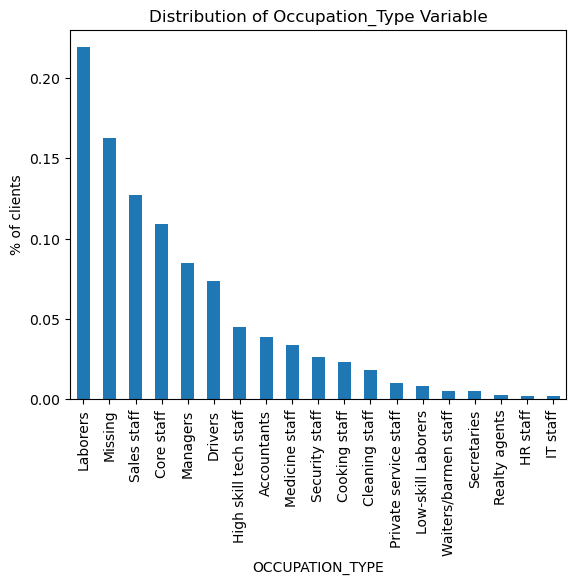

In [420]:
Univariate_cat(application_data,'OCCUPATION_TYPE')

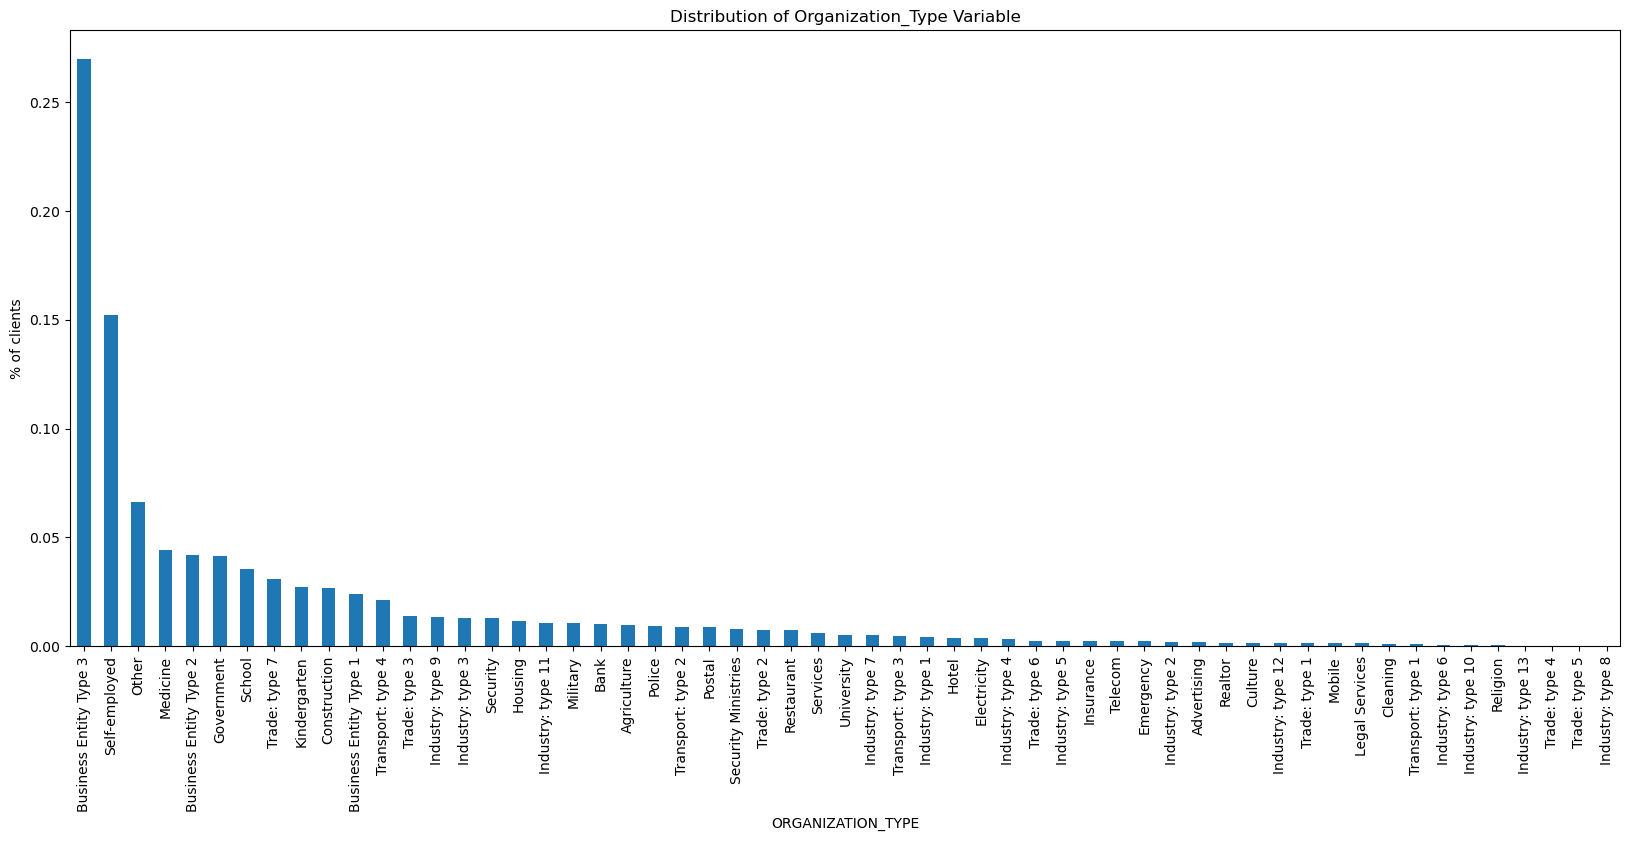

In [421]:
plt.figure(figsize=[20,8])
Univariate_cat(application_data,'ORGANIZATION_TYPE')

### Observations drawn from Univariate analysis of categorical colums : 
1. NAME_CONTRACT_TYPE  : 90 % clients applied for cash loans whereas only 10% clients want revolvong loans
2. CODE_GENDER         : Female clients are applied more than male clients
3. FLAG_OWN_CAR        : 60% clients doesn't own a car out of clients who applied for credit
4. FLAG_OWN_REALTY     : 70% clients own a house out of clients who applied for credit
5. NAME_TYPE_SUITE     : Most of the clients are unaccompained at the time of applying credit
6. NAME_INCOME_TYPE    : Clients who are working professionals has applied most for credit followed by commercial associate.
7. NAME_EDUCATION_TYPE : Clients who has Secondary & secondary special education have applied most for credit.
8. NAME_FAMILY_STATUS  : Married people's applied most for credit.
9. NAME_HOUSING_TYPE   : House / apartment category people has highest percentage(more than 80%) of credit
10. OCCUPATION_TYPE    : Laborers has highest percentage in credit application followed by missing category
11. ORGANIZATION_TYPE  : Business entity type3 category has highest percenatge of credit followed by self employed category.

<h2 Style='color : Green'> Segmented Univariate Analysis </h2>

### Segmented Univariate Analysis of categorical columns

In [422]:
app_cat_Colm = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','INCOME_RANGE','CREDIT_RANGE',
                'ANNUITY_RANGE','AGE_GROUP','EMPLOYED_YEARS_RANGE','GOOD_PRICE_RANGE']

#### NAME_CONTRACT_TYPE Variable

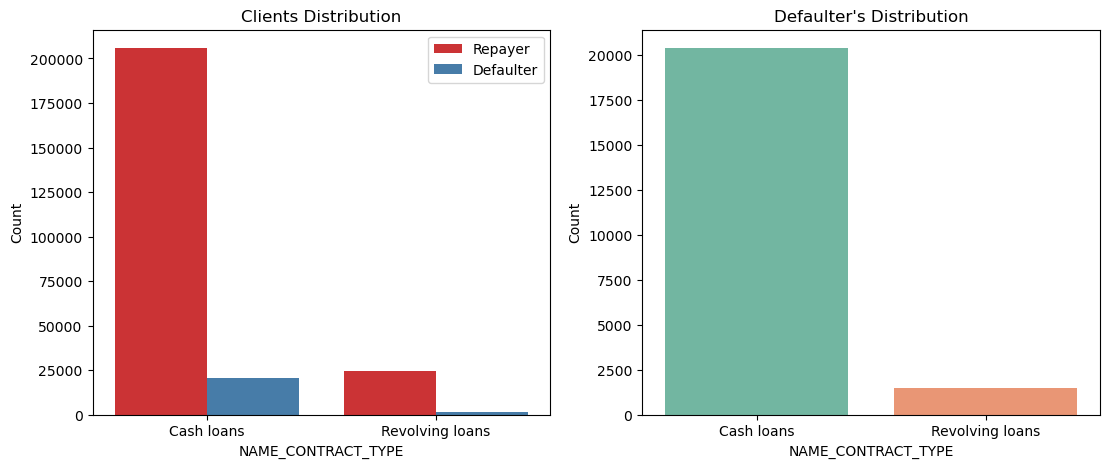

In [423]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=0)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE', data=Defaulter, palette='Set2')
plt.xticks(rotation=0)
plt.title("Defaulter's Distribution")
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show()

### Inference : 
As we can see for repayer, cash loan count is 2,00,00 and revolvong loan count is around 20,000 where as for defauter cash loan count is 20,000 and revolving loans count is 2000. There is not as much relation for contract type variable for Repayer and Defaulter. 

#### CODE_GENDER Variable

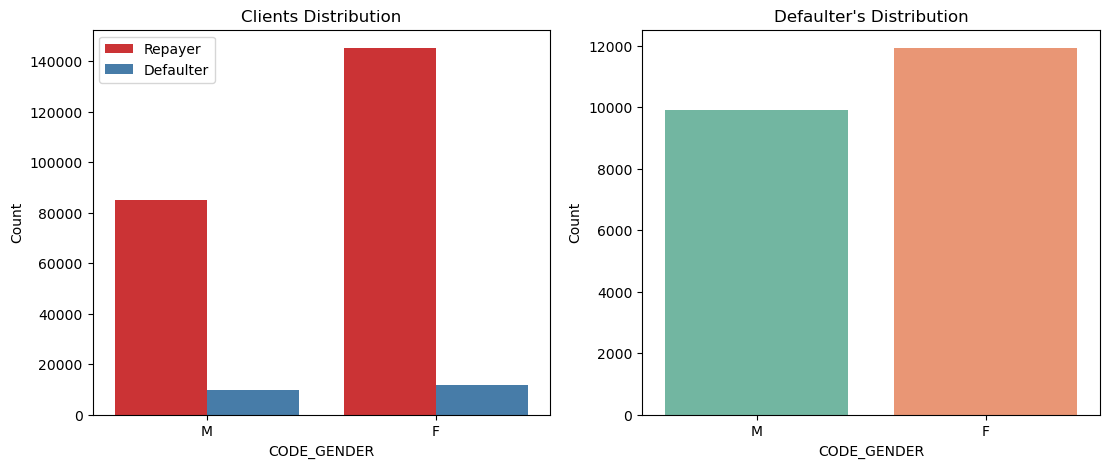

In [424]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=0)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('CODE_GENDER')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER', data=Defaulter, palette='Set2')
plt.xticks(rotation=0)
plt.title("Defaulter's Distribution")
plt.xlabel('CODE_GENDER')
plt.ylabel('Count')
plt.show()

### Inference: 
We can see that Male's are more likely to defaulting credit where as females comparatively less likely to defaulting credits.

#### FLAG_OWN_CAR Variable

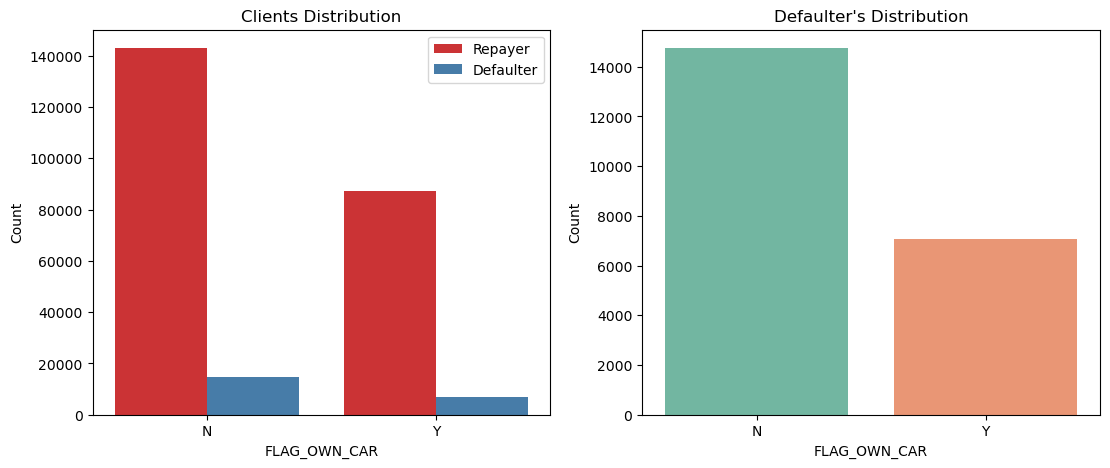

In [425]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_CAR', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=0)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_CAR', data=Defaulter, palette='Set2')
plt.xticks(rotation=0)
plt.title("Defaulter's Distribution")
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Count')
plt.show()

### Inference :
People who are owning car have less chances (less than 10%) to default on credit compare to people dont have car (More than 10%)

### FLAG_OWN_REALTY Variable

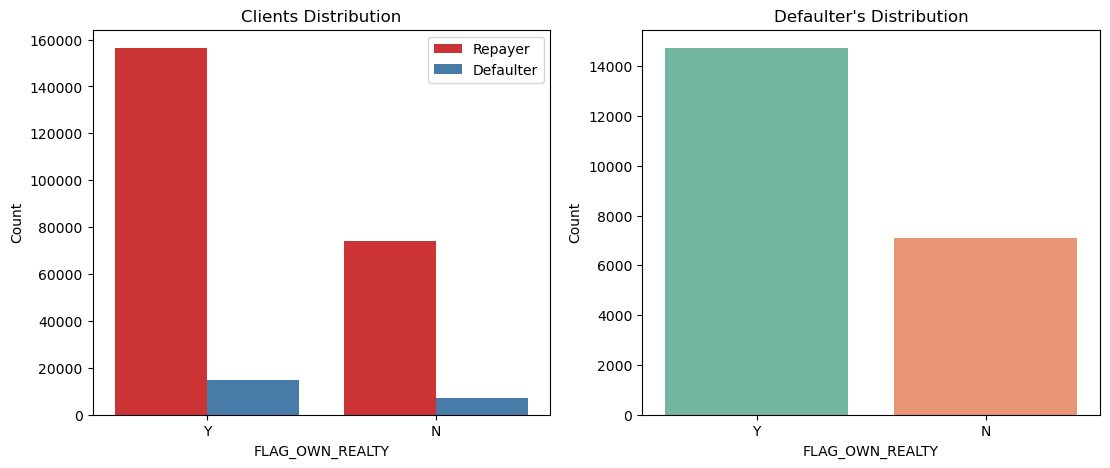

In [426]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_REALTY', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=0)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_REALTY', data=Defaulter, palette='Set2')
plt.xticks(rotation=0)
plt.title("Defaulter's Distribution")
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Count')
plt.show()

### Inference :
Overall client count is double who own realty (house/flat) than who dont own but there is no as such correlation between owning realty and defaulting loan or repaying loan. 

### NAME_TYPE_SUITE Variable

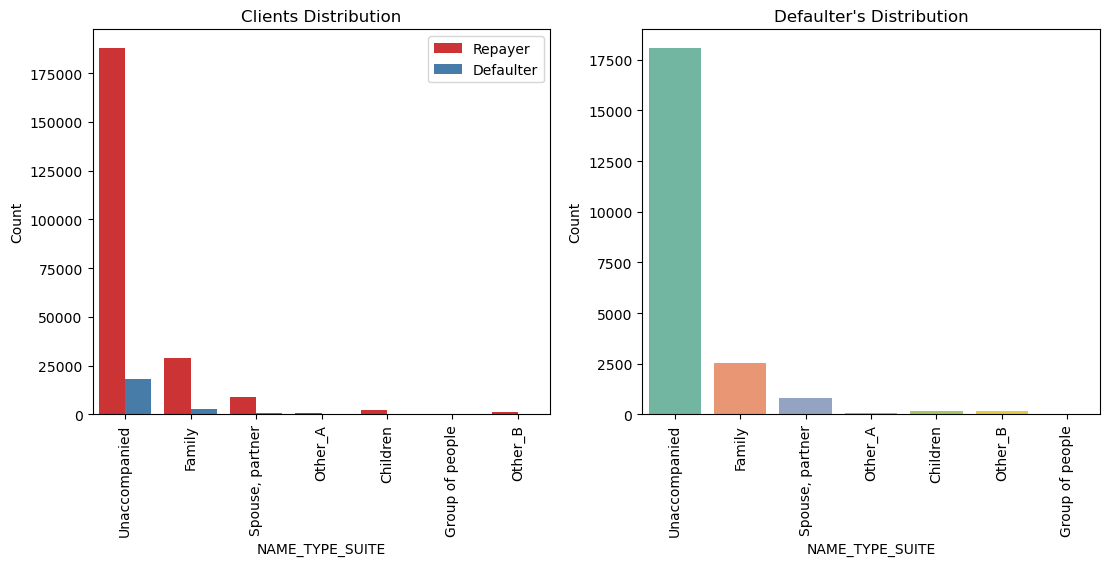

In [427]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='NAME_TYPE_SUITE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_TYPE_SUITE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='NAME_TYPE_SUITE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('NAME_TYPE_SUITE')
plt.ylabel('Count')
plt.show()

### Inference :
As we can see that almost all type of suite has approx 10 % defaulting rate there is no strong correlation between any suite type and defaulting or repaying loan.

### NAME_INCOME_TYPE Variable

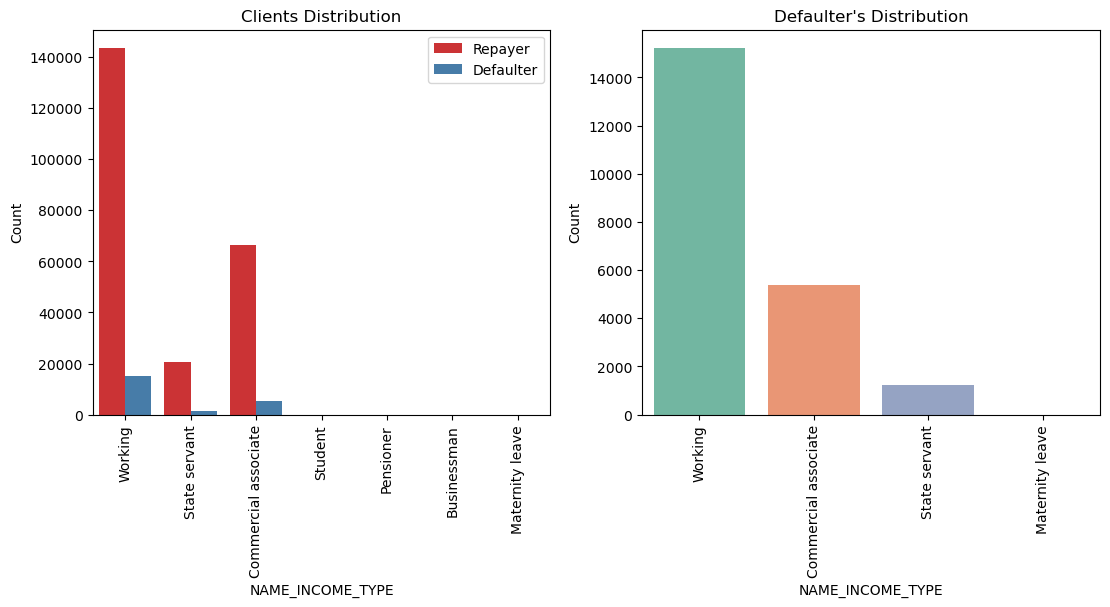

In [428]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Count')
plt.show()

### Inference:
1. Commercial associate and state servant are less likely to default on credit as compare to working income type.
2. Student , businessman and pensioner have no defaulter percentage means they are more likely to pay.

### NAME_EDUCATION_TYPE Variable

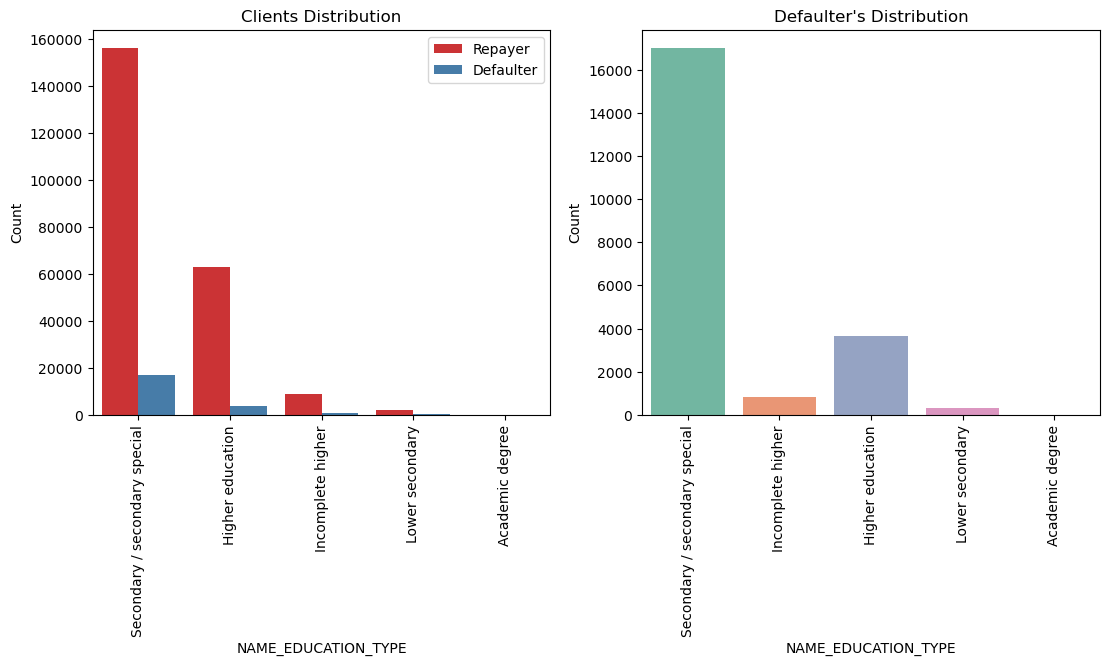

In [429]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.show()

### Inference :
Clients who have secondary/secondary special education type are more likely to default on credit as default percentage is almost 15 % which is highest across all education types where as higher education type clients are less likely to default.

### NAME_FAMILY_STATUS Variable

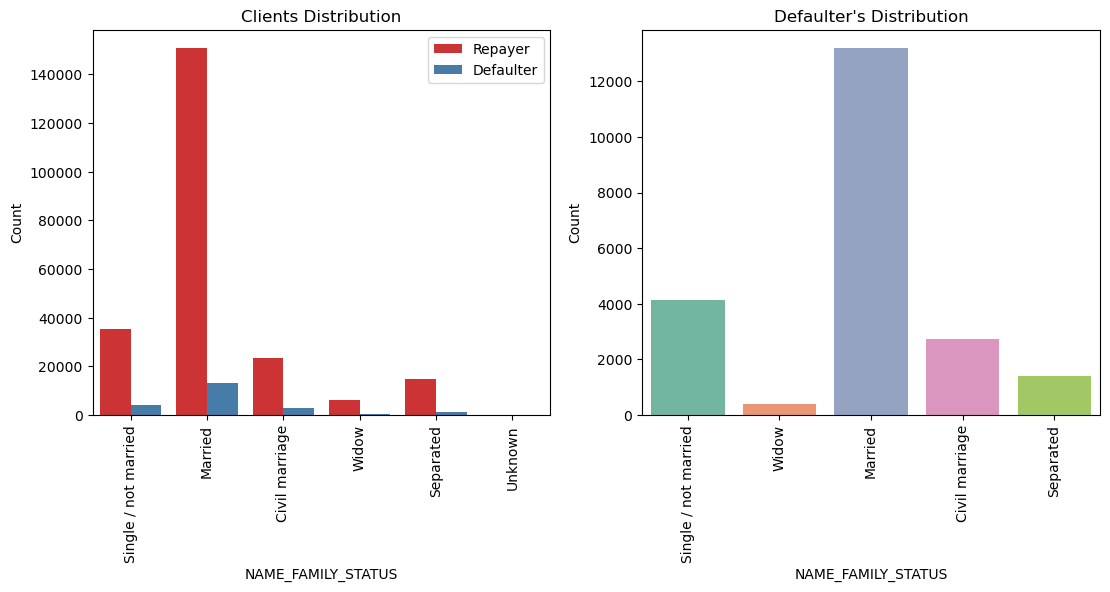

In [430]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='NAME_FAMILY_STATUS', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='NAME_FAMILY_STATUS', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Count')
plt.show()

### Inference : 
1. Clients who are married most likely to take credit followed by single/not married and civil marriage
2. Clients who has civil marriages are most likely to default on credit compared to others

### NAME_HOUSING_TYPE Variable

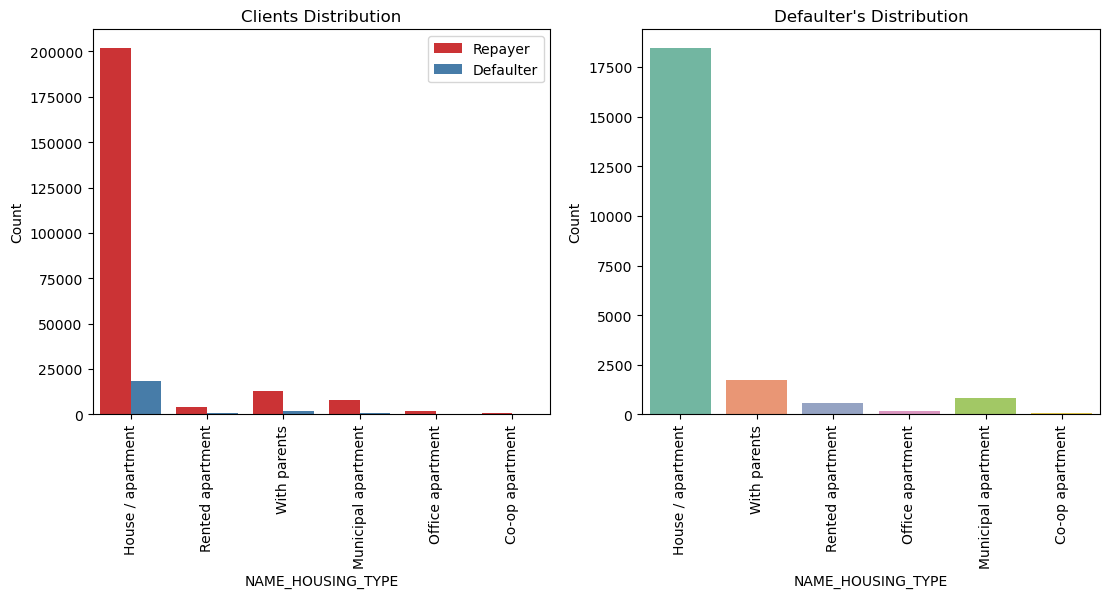

In [431]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='NAME_HOUSING_TYPE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='NAME_HOUSING_TYPE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Count')
plt.show()

### Inference : 
1. People living in house/apartment are taking more loans.
2. Rented people are more likely to default on credit.

### OCCUPATION_TYPE variable

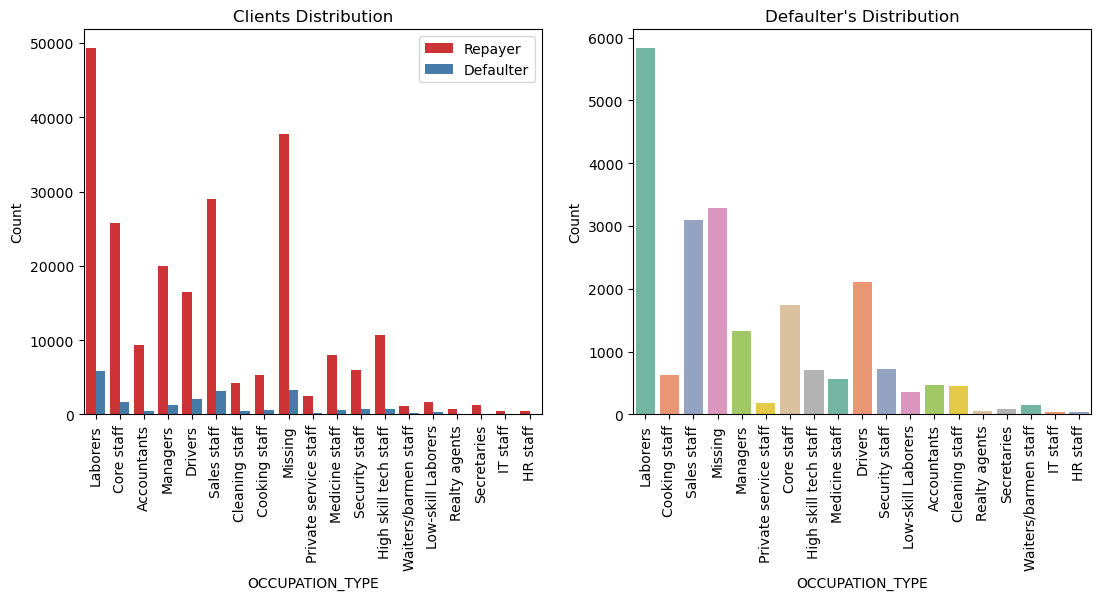

In [432]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count')
plt.show()

### Inference :
1. Low skill laborers are most likely to default as there percentage of default are high.

### INCOME_RANGE Variable

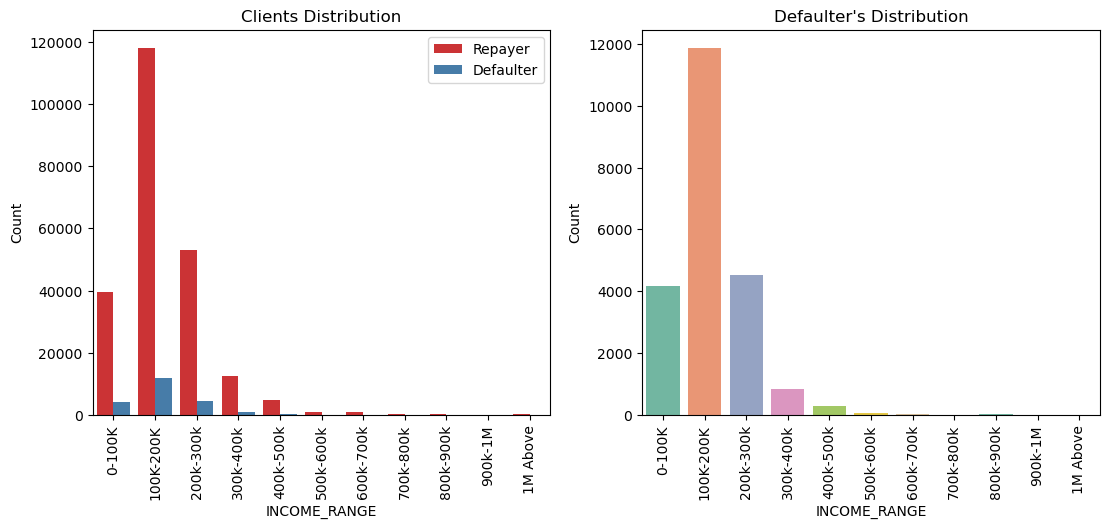

In [433]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='INCOME_RANGE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('INCOME_RANGE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='INCOME_RANGE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('INCOME_RANGE')
plt.ylabel('Count')
plt.show()

### Inference :
1. Although clients who has income range from 600K to 1M above are very less in numbers, they are less likely to default.
2. Clients who has income range from 0-100K are more likely to default as there percentage of defaults are approximately more than 10 %.

### CREDIT_RANGE Variable

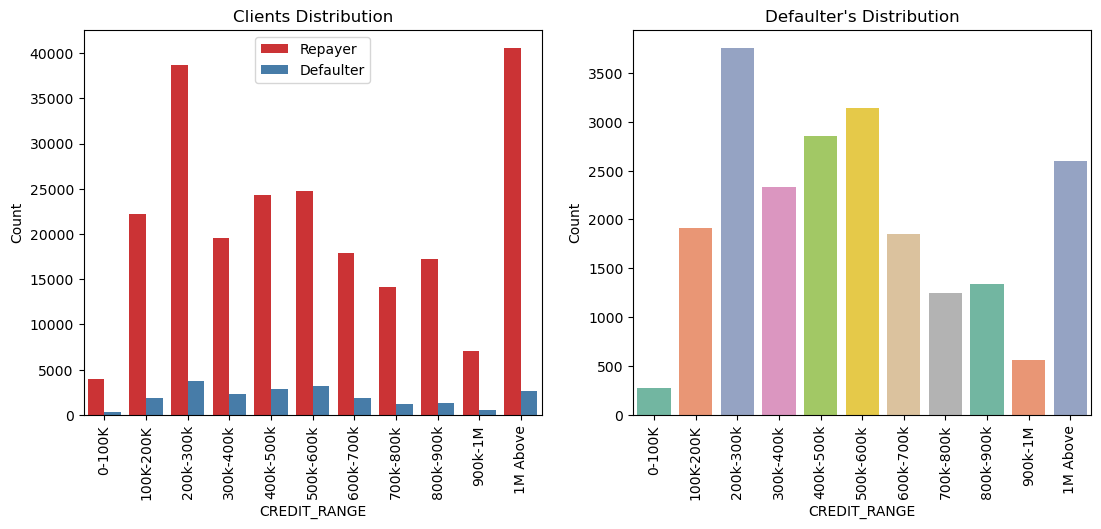

In [434]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='CREDIT_RANGE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('CREDIT_RANGE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='CREDIT_RANGE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('CREDIT_RANGE')
plt.ylabel('Count')
plt.show()

### Inference :
1. Clients who are applied for credit range in between 500K-600K are more likely default followed by 400K-500K and 300K-400K credit range.
2. Clients who are applied for above 1M credit are looking more promissing in terms of repayment.

### ANNUITY_RANGE Variable

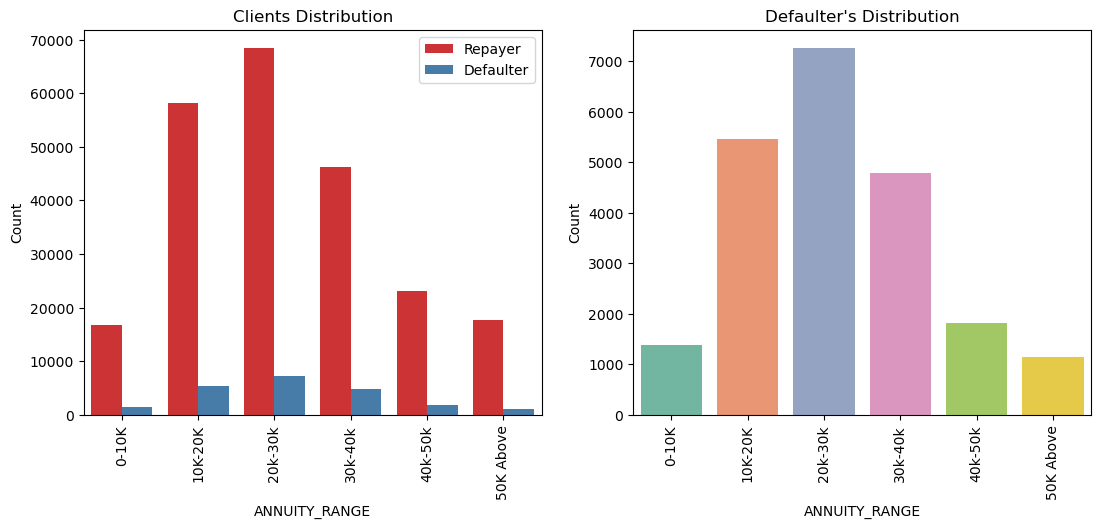

In [435]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='ANNUITY_RANGE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('ANNUITY_RANGE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='ANNUITY_RANGE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('ANNUITY_RANGE')
plt.ylabel('Count')
plt.show()

### Inference :
1. Clients who has annuity range in between 20K-30K are more likely to default on their credit.
2. Clients who has above 50K annuity are less likely to default.

### AGE_GROUP Variable

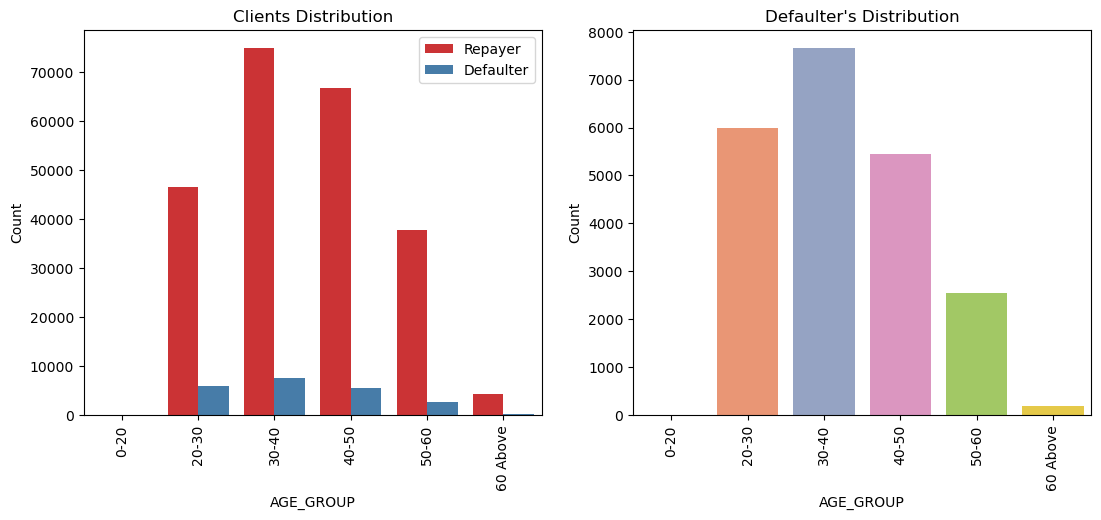

In [436]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='AGE_GROUP', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('AGE_GROUP')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='AGE_GROUP', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('AGE_GROUP')
plt.ylabel('Count')
plt.show()

### Inference : 
1. Clients who's age ranges between 20-30 years are most likely default as there percentage of default is greater than 12% which is quite higher than other age groups
2. Clients who has age above 50 are looking more promissing in terms of loan repayment.

### EMPLOYED_YEARS_RANGE Variable 

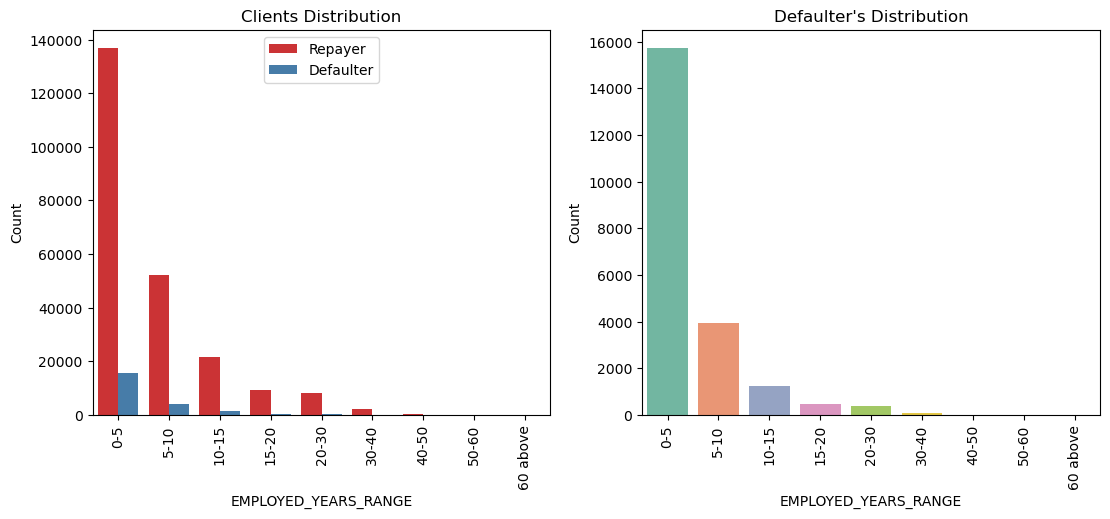

In [437]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='EMPLOYED_YEARS_RANGE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('EMPLOYED_YEARS_RANGE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='EMPLOYED_YEARS_RANGE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('EMPLOYED_YEARS_RANGE')
plt.ylabel('Count')
plt.show()

### Inference :
1. Clients who has current employment range in between 0-5 year are most likely to default
2. Defaulting percentage is decreasing as experienced range increases.

### GOOD_PRICE_RANGE Variable

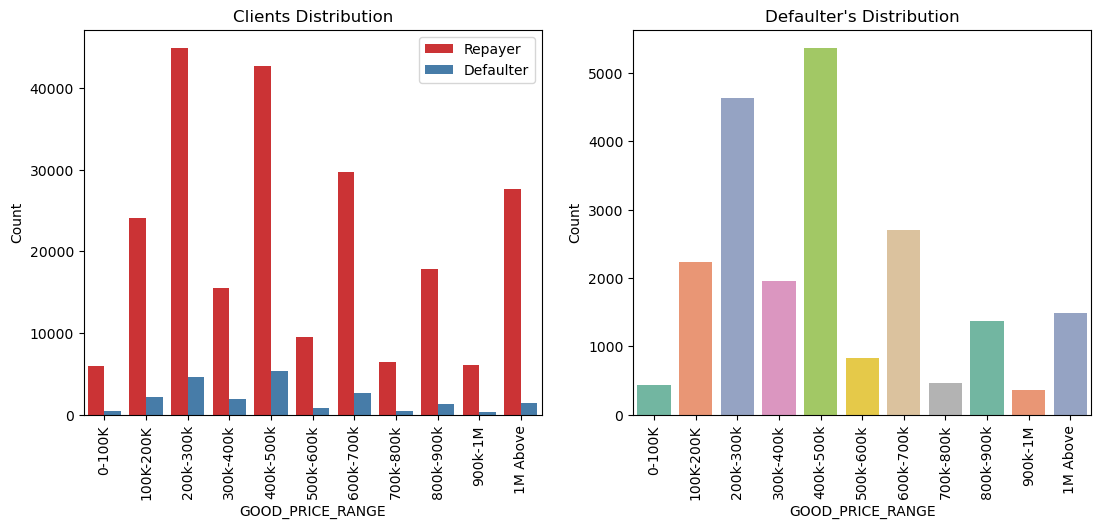

In [438]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.countplot(x='GOOD_PRICE_RANGE', data=application_data,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title("Clients Distribution")
plt.legend(['Repayer','Defaulter'])
plt.xlabel('GOOD_PRICE_RANGE')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x='GOOD_PRICE_RANGE', data=Defaulter, palette='Set2')
plt.xticks(rotation=90)
plt.title("Defaulter's Distribution")
plt.xlabel('GOOD_PRICE_RANGE')
plt.ylabel('Count')
plt.show()

### Inference :
1. Clients who are purchasing goods ranges between 400K-500K are most likely to default.
2. Clients who are purchasing goods ranges between 900K-1M have more probability to repay their credit.

<h2 Style='color : Green'> Bivariate Analysis of application data set variables </h2>

In [439]:
app_cat_Colm = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','INCOME_RANGE','CREDIT_RANGE',
                'ANNUITY_RANGE','AGE_GROUP','EMPLOYED_YEARS_RANGE','GOOD_PRICE_RANGE']

### AMT_INCOME_TOTAL Vs AMT_CREDIT

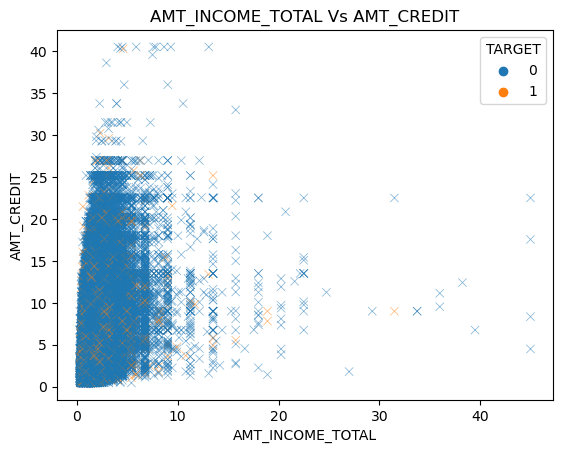

In [440]:
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT', data=application_data,hue='TARGET', alpha=0.6, marker='x');
plt.title('AMT_INCOME_TOTAL Vs AMT_CREDIT')
plt.show()

### Inference :
1. As we can see all values are skewed at bottom left of the graph.
2. Clients with high income and high credit are more likely to repay their credits.

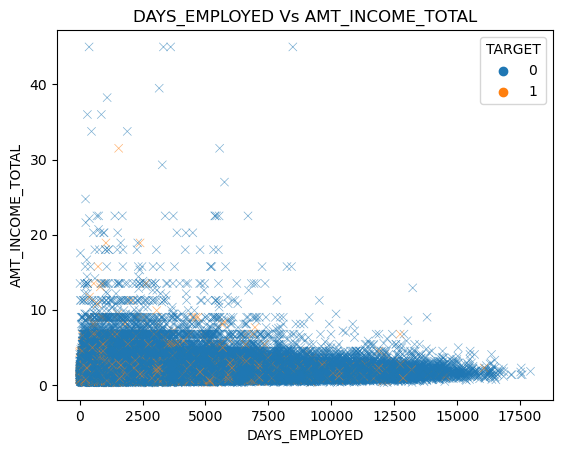

In [441]:
sns.scatterplot(x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL', data=application_data,hue='TARGET', alpha=0.6, marker='x');
plt.title('DAYS_EMPLOYED Vs AMT_INCOME_TOTAL')
plt.show()

### Inference :
1. Clients who are above 1M income and have current employment upto 20 years are looking more promissing in terms of loan repayment.

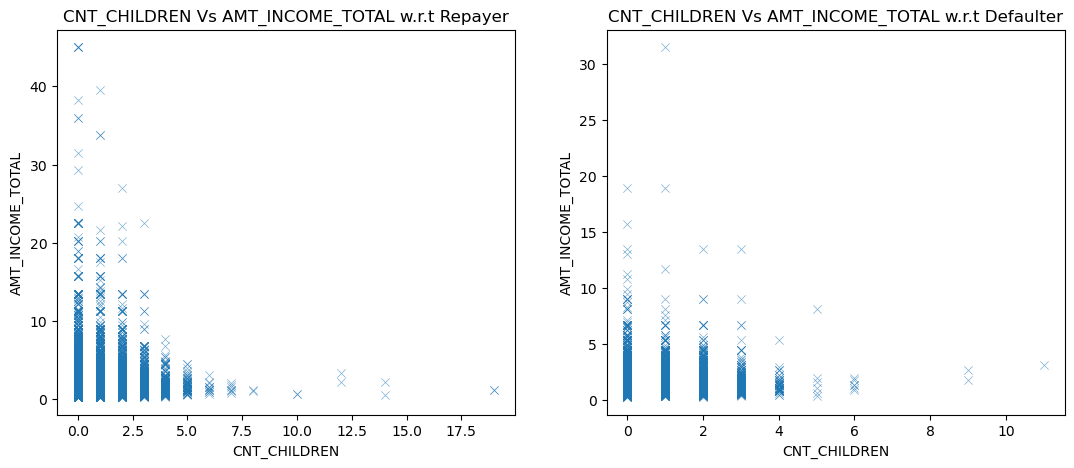

In [442]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.scatterplot(x='CNT_CHILDREN',y='AMT_INCOME_TOTAL', data=Repayer, alpha=0.6, marker='x');
plt.title('CNT_CHILDREN Vs AMT_INCOME_TOTAL w.r.t Repayer')

plt.subplot(1,2,2)
sns.scatterplot(x='CNT_CHILDREN',y='AMT_INCOME_TOTAL', data=Defaulter, alpha=0.6, marker='x');
plt.title('CNT_CHILDREN Vs AMT_INCOME_TOTAL w.r.t Defaulter')
plt.show()

### Inference :
1. Clients having upto 2 childrens and above 1M income are less likely to default on their credits

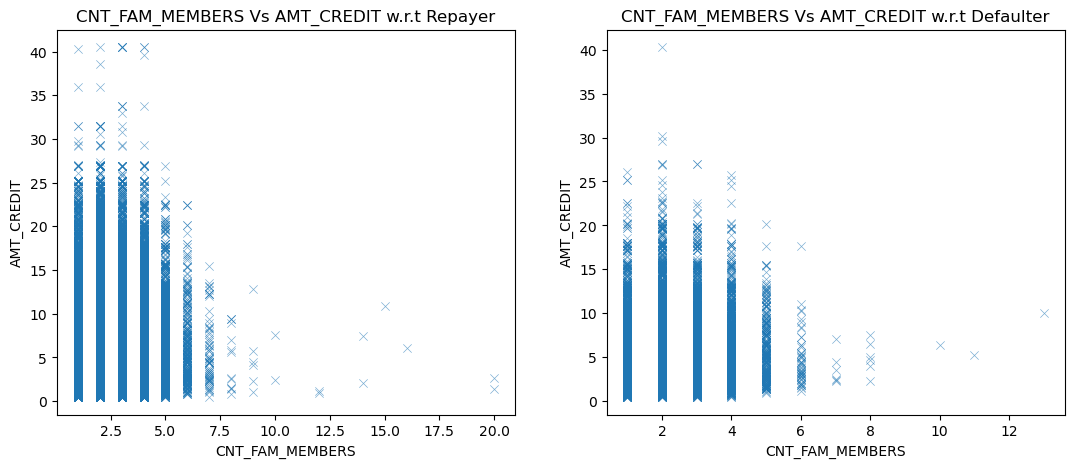

In [443]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.scatterplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT', data=Repayer, alpha=0.6, marker='x');
plt.title('CNT_FAM_MEMBERS Vs AMT_CREDIT w.r.t Repayer')

plt.subplot(1,2,2)
sns.scatterplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT', data=Defaulter, alpha=0.6, marker='x');
plt.title('CNT_FAM_MEMBERS Vs AMT_CREDIT w.r.t Defaulter')
plt.show()

### Inference :
1. Clients who has credit amount above 20 lakhs and having upto 4 family members are more likely to repay their credits. 

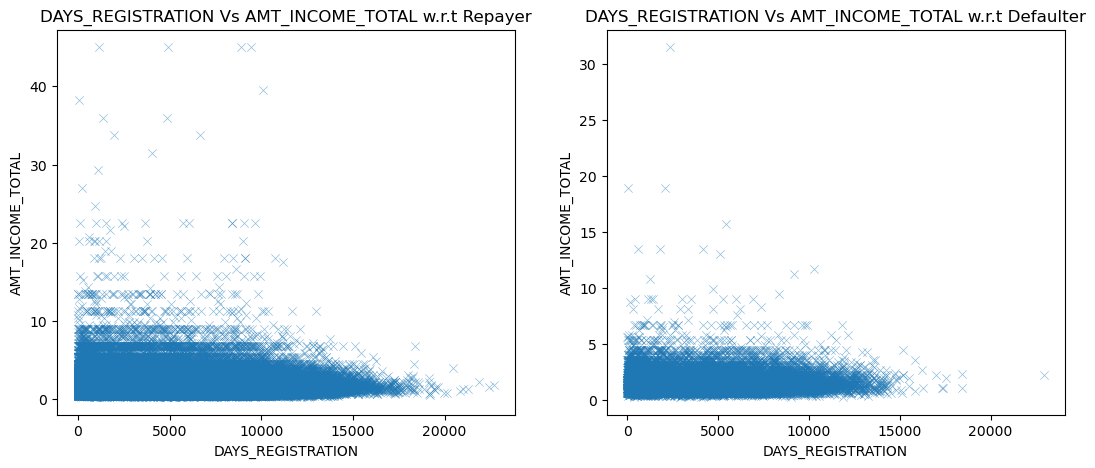

In [444]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.scatterplot(x='DAYS_REGISTRATION',y='AMT_INCOME_TOTAL', data=Repayer, alpha=0.5, marker='x');
plt.title('DAYS_REGISTRATION Vs AMT_INCOME_TOTAL w.r.t Repayer')

plt.subplot(1,2,2)
sns.scatterplot(x='DAYS_REGISTRATION',y='AMT_INCOME_TOTAL', data=Defaulter, alpha=0.5, marker='x');
plt.title('DAYS_REGISTRATION Vs AMT_INCOME_TOTAL w.r.t Defaulter')
plt.show()

### Inference :
1. Clients who has income above 500K and changes his/her registration in last 25 years have more probality to repay their credits

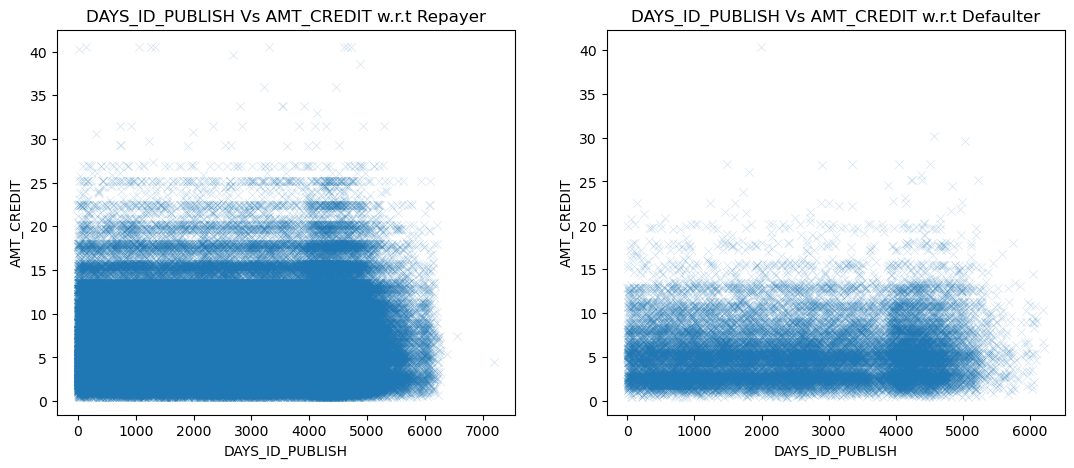

In [445]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
sns.scatterplot(x='DAYS_ID_PUBLISH',y='AMT_CREDIT', data=Repayer, alpha=0.2, marker='x');
plt.title('DAYS_ID_PUBLISH Vs AMT_CREDIT w.r.t Repayer')

plt.subplot(1,2,2)
sns.scatterplot(x='DAYS_ID_PUBLISH',y='AMT_CREDIT', data=Defaulter, alpha=0.2, marker='x');
plt.title('DAYS_ID_PUBLISH Vs AMT_CREDIT w.r.t Defaulter')
plt.show()

### Inference :
1. Clients who have above 1.5M credit amount and even though changes their ID in past 10-12 years are more likey to repay their credits

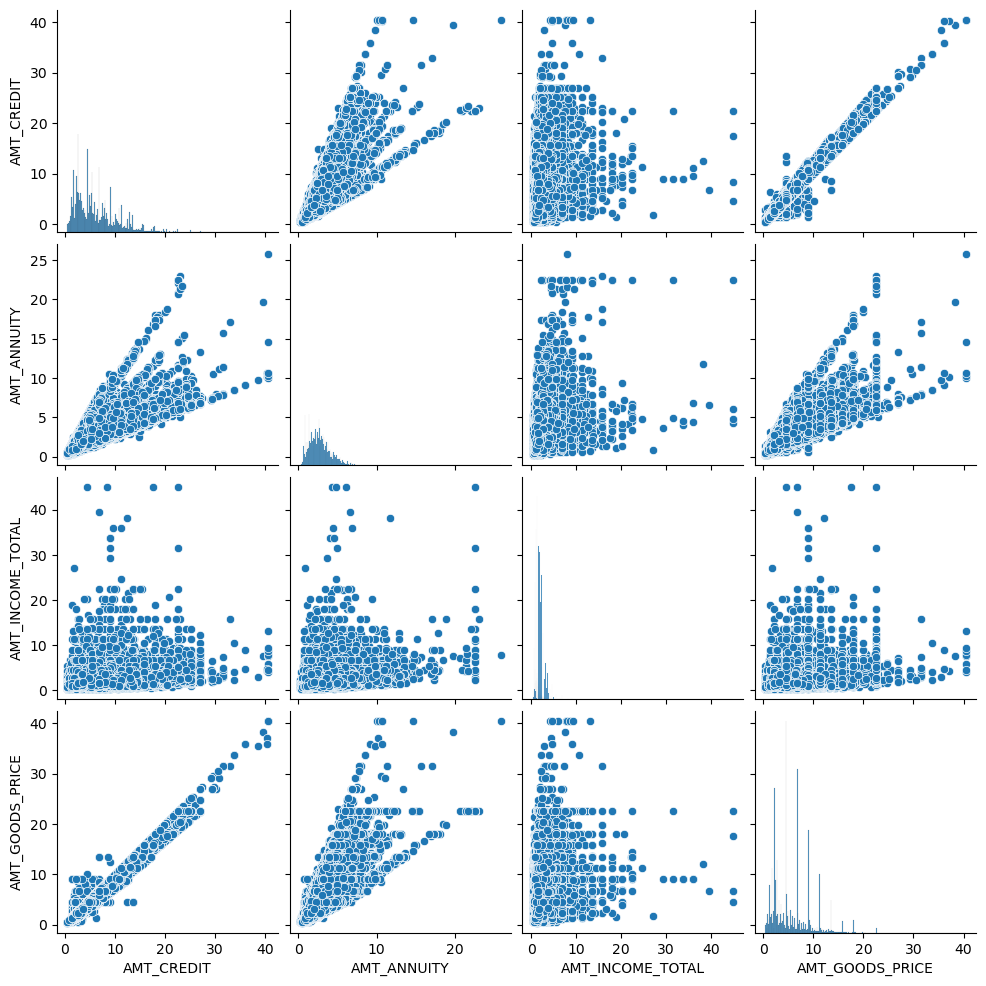

In [446]:
#Plotting pairplot between amount variable
sns.pairplot(application_data[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']])
plt.show()

### Inference :
1. There is no strong relationship between these variable except AMT_CREDIT & AMT_GOOD_PRICE and there is high relationship between these variable because Good price is nothing but credit amount for consumer loan.

### Checking correlation between Income range and Credit Range w.r.t target variable

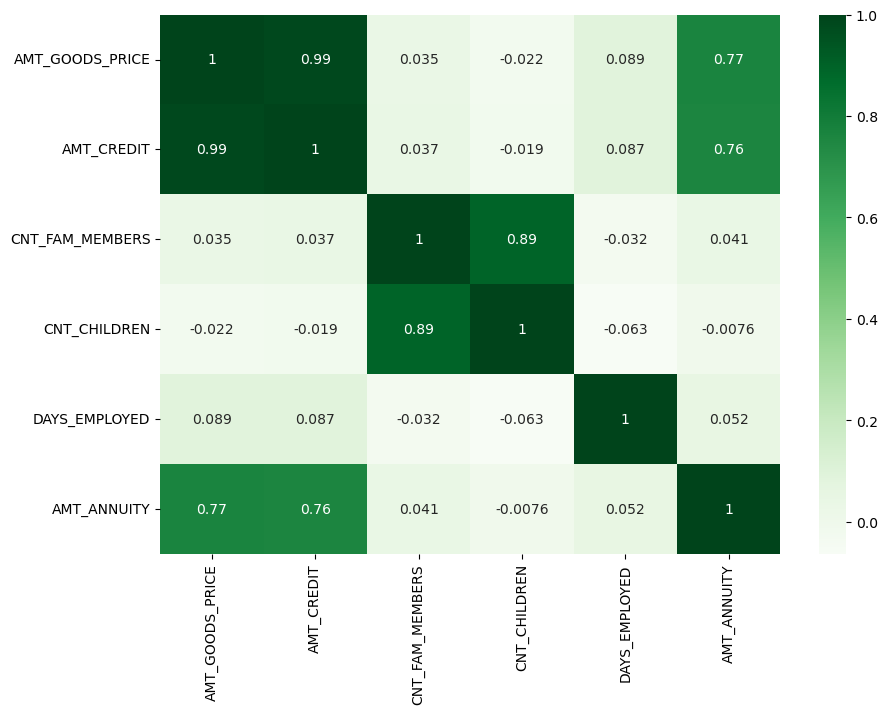

In [447]:
plt.figure(figsize=[10,7])
sns.heatmap(Repayer[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','DAYS_EMPLOYED','AMT_ANNUITY']].corr(), annot=True, cmap ="Greens")
plt.show()

### Inference: 
There is very high correlation between below variable pairs.
1. Credit amount & Good price amount (0.99)
2. Count of childrens and count family members (0.89)
3. Annuity amount with credit & goods price amount (0.76 & 0.77 resp.

Also for below variables there is very less correlation in between them.
1. Count of children and annuity amount (-0.0076)
2. Credit amount and Count of children (-0.019)
3. Amount goods price and Count of children (-0.022)

<h2 Style='color : Green'> Univariate Analysis of Previous application data set variables </h2>

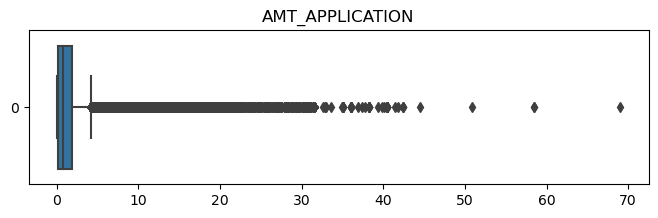

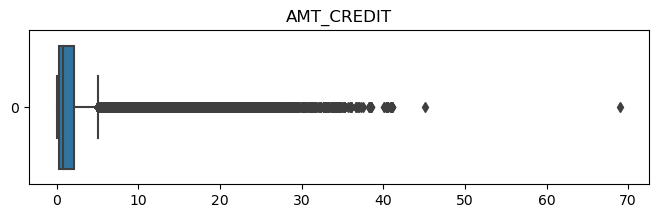

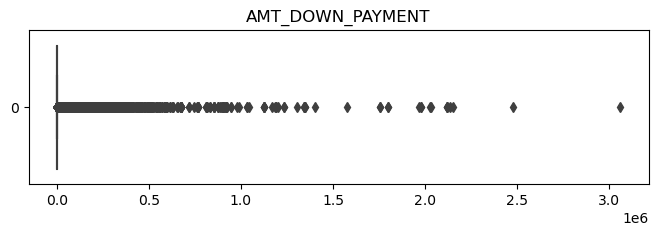

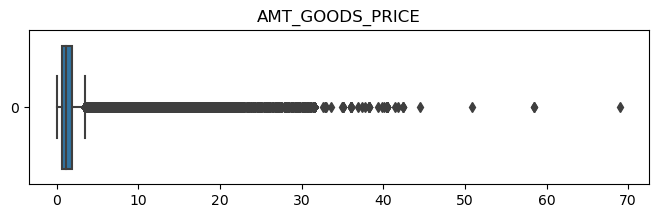

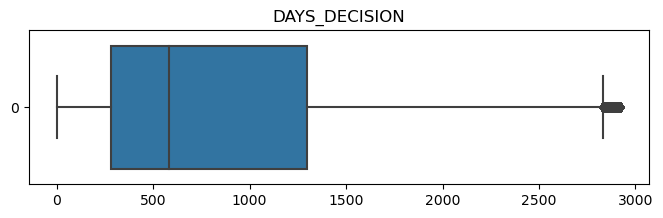

In [448]:
# Univariate analysis of previous application of numerical columns
for i in prev_cont_colm:
    plt.figure(figsize=[8,2])
    sns.boxplot(previous_application[i],orient='h');
    plt.title(i)
    plt.show()

### Inferences : 
1. AMT_APPLICATION  : Almost 75 % clients have applications amount below 300K
2. AMT_CREDIT       : Almost 75 % clients have credit amount below 300K
3. AMT_DOWN_PAYMENT : Alomst 85 % clients had made down payment less than 5000 and there are few client who had made down                             payment around 25K-30K
4. AMT_GOODS_PRICE  : Amount good price percentage is almost same as amount credit.
5. DAYS_DECISION    : 25 % clients had applied again for credit in 1 year and 75% clients had applied again in between 1-3.5                           years

In [449]:
prev_cat_Colm = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS']

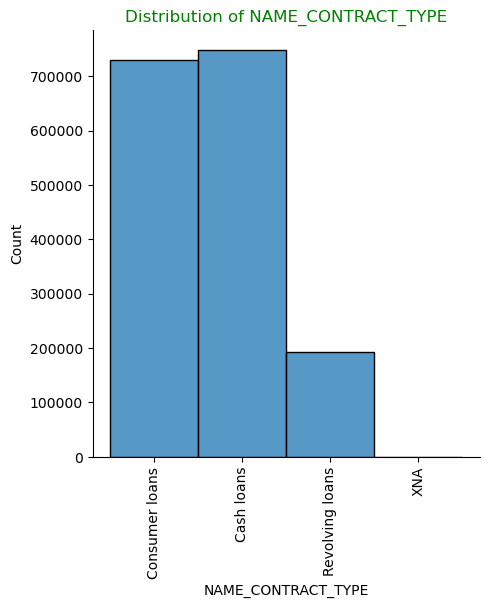

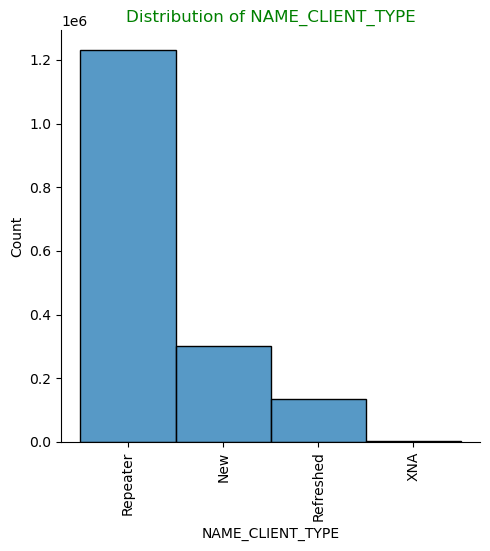

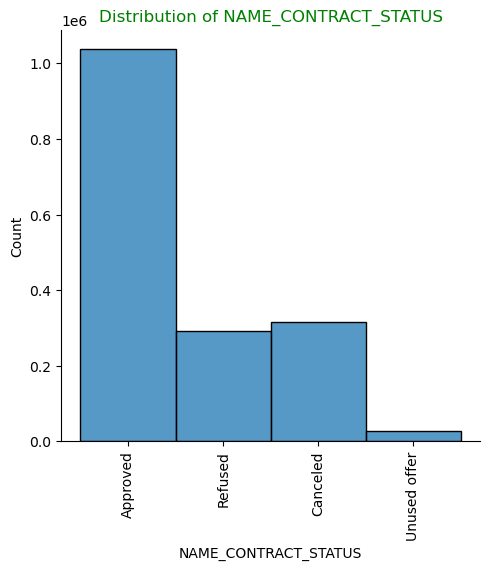

In [450]:
# Univariate analysis of previous application of Categorical columns
for i in prev_cat_Colm:
    sns.displot(previous_application[i]);
    plt.xticks(rotation=90)
    plt.title('Distribution of ' + i, fontdict={'color':'Green'})
    plt.show()

### Inference:
1. NAME_CONTRACT_TYPE   : Above 1.4M clients had consumer and cash loans combinedly.
2. NAME_CLIENT_TYPE     : Almost 1.2M client are repeaters.
3. NAME_CONTRACT_STATUS : Approx 3M clients application has been rejected. Canceled & refused clients has almost same numbers.

<h2 Style='color : Green'> Segmented Univariate Analysis of Previous application data set variables </h2>

In [451]:
def Segmented_univariate (data, column):
    plt.figure(figsize=[13,5])
    sns.countplot(x=column, data=data,hue='NAME_CONTRACT_STATUS', palette='Set1')
    plt.xticks(rotation=90)
    plt.title(column + ' w.r.t NAME_CONTRACT_STATUS' )
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()   

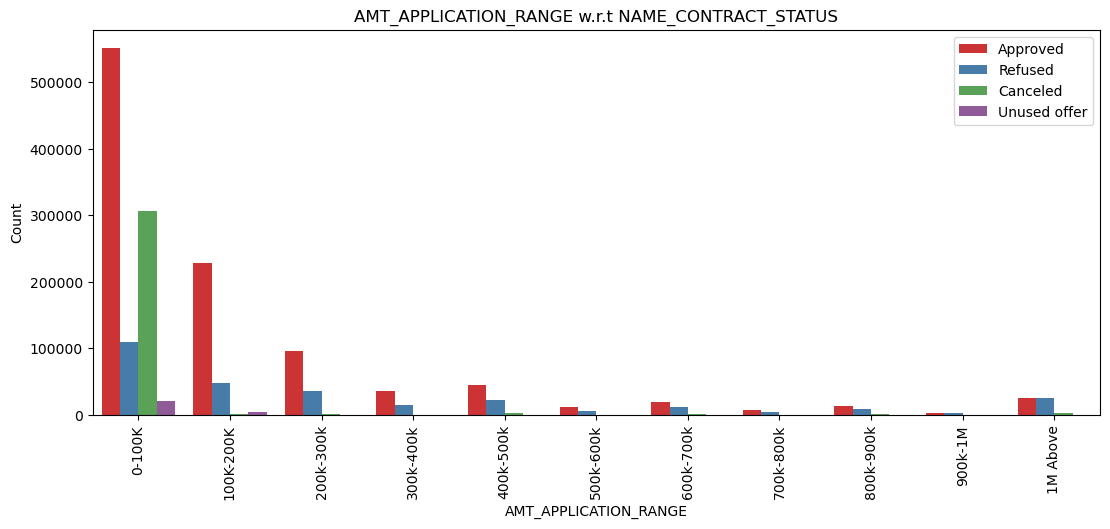

In [452]:
Segmented_univariate(previous_application,'AMT_APPLICATION_RANGE')

### Inference :
1. Clients who has applications ranges between 0-100K are more likely to approve by bank
2. Applications which have 1M above amount have 50% chances to get rejected. 

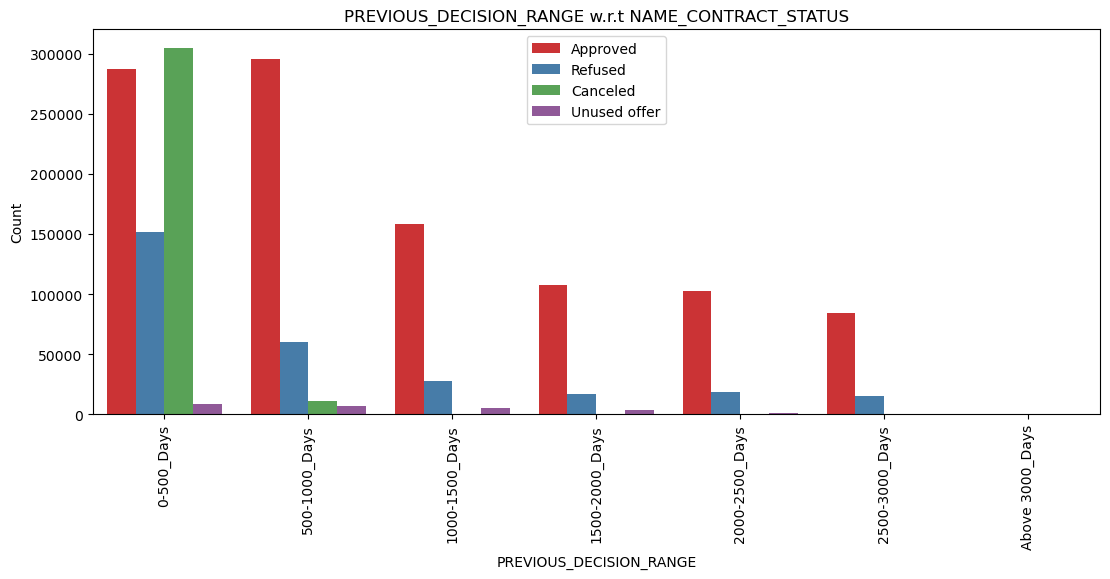

In [453]:
Segmented_univariate(previous_application,'PREVIOUS_DECISION_RANGE')

### Inference:
1. Clients who applied between 1.5 to 3 year after a previous application are more likely to get approved their loans.
2. Clients who are applying within 0-1.5 year have almost 50% chances to cancelled their application

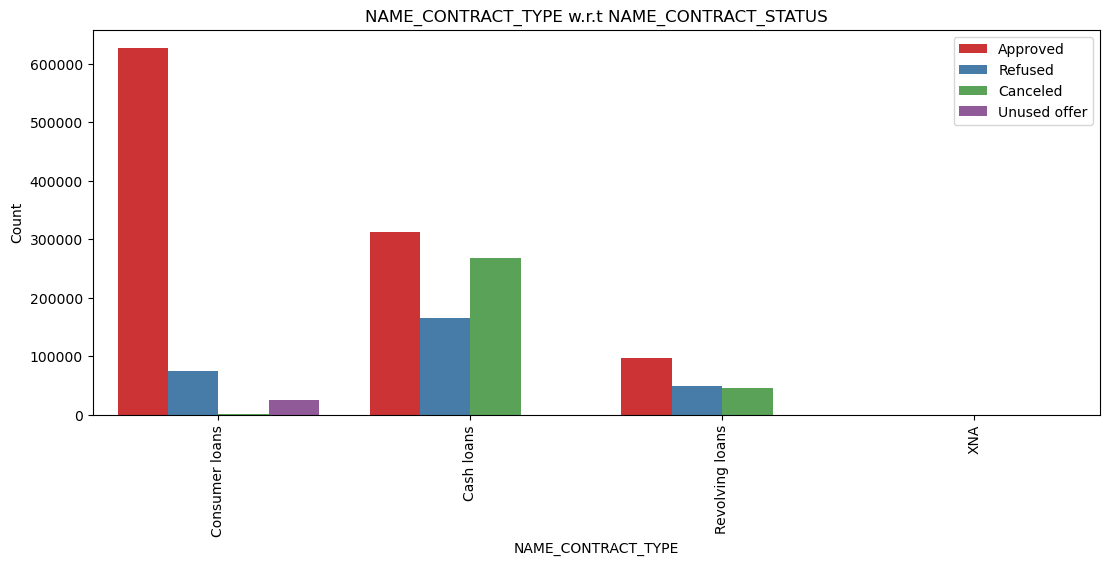

In [454]:
Segmented_univariate(previous_application,'NAME_CONTRACT_TYPE')

### Inference :
1. Banks are more likely to approve consumer loans other than cash and revolving loans.
2. Clients are not cancelling their loan if they applied for consumer loans.

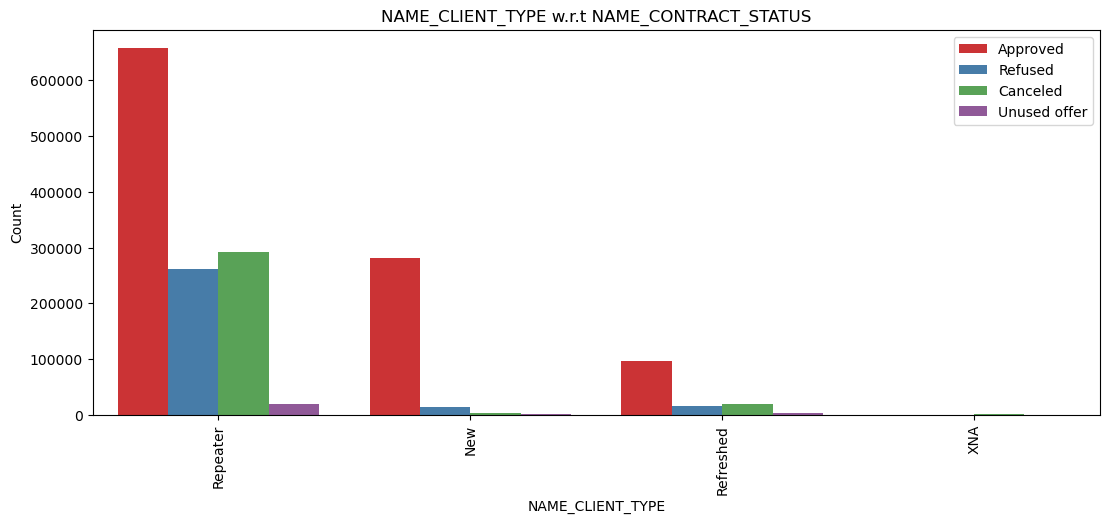

In [455]:
Segmented_univariate(previous_application,'NAME_CLIENT_TYPE')

<h2 Style='color : Green'> Biivariate Analysis of Previous application data set variables </h2>

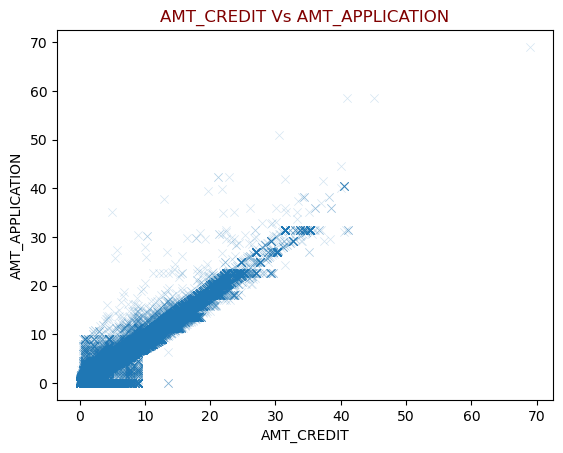

In [456]:
sns.scatterplot(x='AMT_CREDIT',y='AMT_APPLICATION', data=previous_application,alpha=0.2, marker='x');
plt.title('AMT_CREDIT Vs AMT_APPLICATION', fontdict={'color':'Maroon'})
plt.show()

### Inference:
1. There is high positive linear relationship between credit amount and application amount.

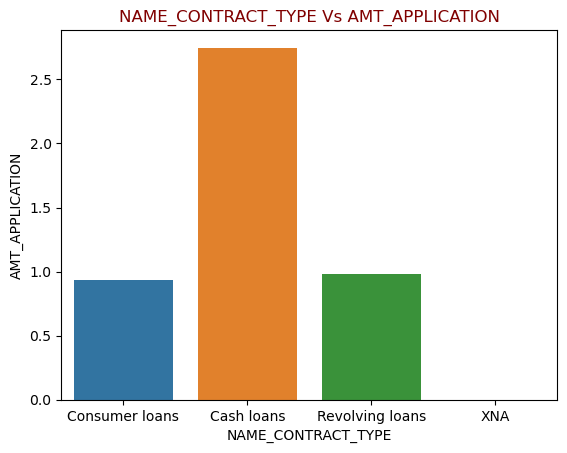

In [457]:
sns.barplot(x='NAME_CONTRACT_TYPE',y='AMT_APPLICATION', data=previous_application, ci=None);
plt.title('NAME_CONTRACT_TYPE Vs AMT_APPLICATION', fontdict={'color':'Maroon'})
plt.show()

### Inference :
1. Amount of application is comparatively high for cash loans other than consumer and revolving loans

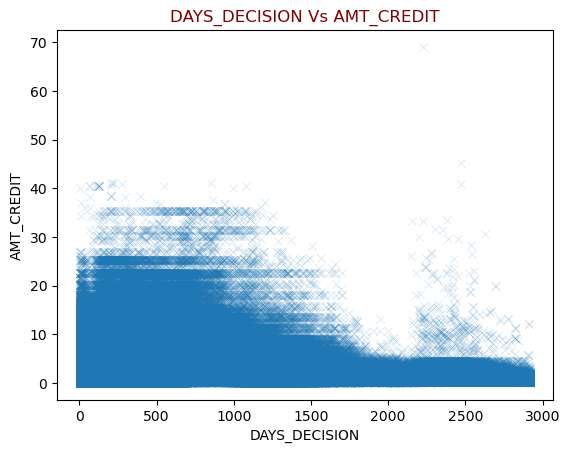

In [458]:
sns.scatterplot(x='DAYS_DECISION',y='AMT_CREDIT', data=previous_application,alpha=0.2, marker='x');
plt.title('DAYS_DECISION Vs AMT_CREDIT', fontdict={'color':'Maroon'})
plt.show()

### Inference :
1. Clients who are applying again within 0 to 3 year getting around 2M amount loans.

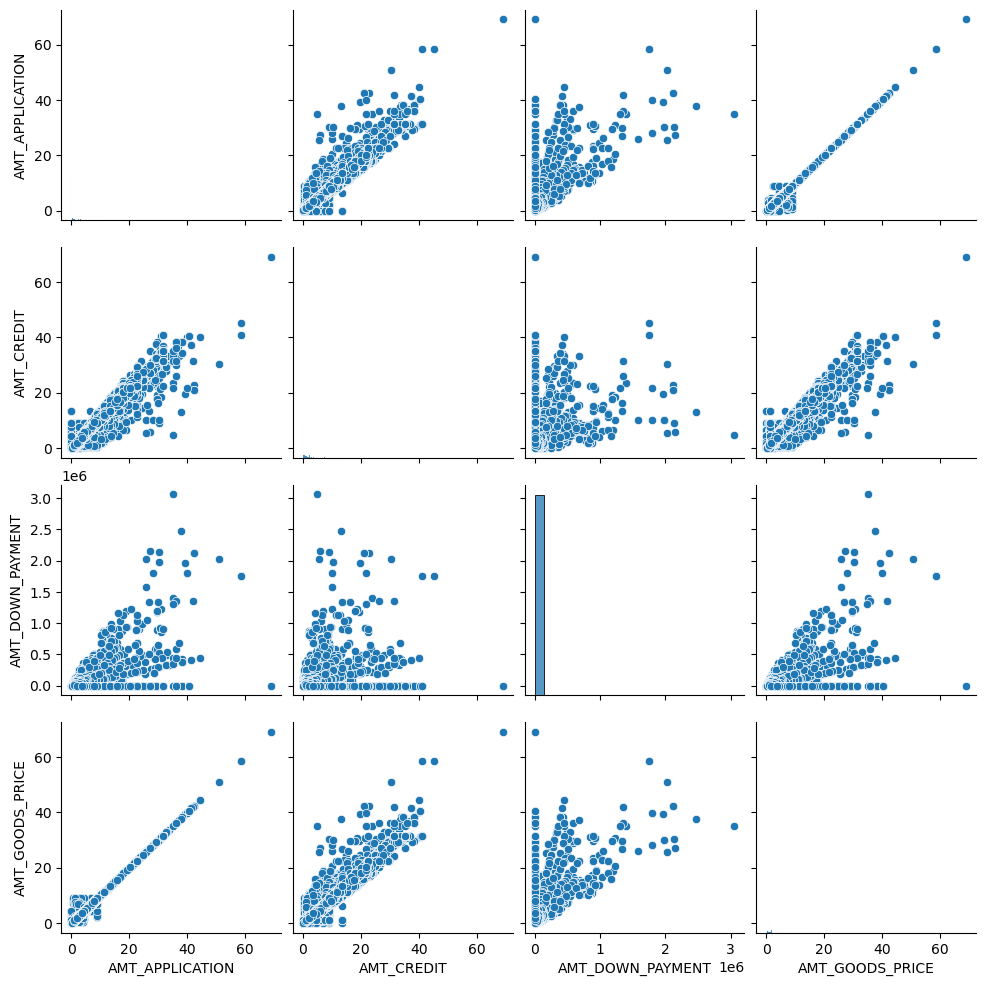

In [459]:
# Checking relationship between variable using pair plot.
sns.pairplot(previous_application[['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']])
plt.show()

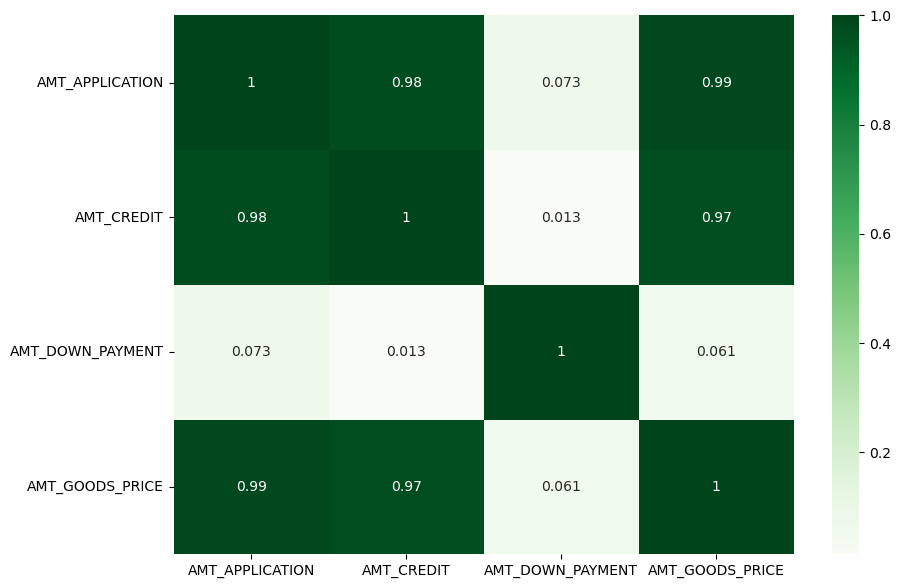

In [460]:
#Checking correlation between amount variable using heatmap
plt.figure(figsize=[10,7])
sns.heatmap(previous_application[['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap ="Greens")
plt.show()

### Inference :
1. There is very high correlation between AMT_APPLICATION , AMT_CREDIT and AMT_GOODS_PRICE variable.

There is very less correlation in between below variables.
1. Credit amount and down payment amount (0.013)
2. Application amount and down payment amount (0.073)
3. Goods price amount and down payment (0.061)

<h2 Style='color : Green'> Merged Dataframe Analysis </h2>

In [461]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merged_df = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR')
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        2.47005              3.510   Unaccompanied          Working   
1        3.56985             11.295          Family    State servant   
2        3.56985             11.295          Family    State servant   
3        3.56985             11.295          Family    State servant   
4        0.67500              1.350   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [462]:
# Checking shape of merged dataframe
merged_df.shape

(1140100, 93)

In [463]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140100 entries, 0 to 1140099
Data columns (total 93 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1140100 non-null  int64   
 1   TARGET                        1140100 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1140100 non-null  object  
 3   CODE_GENDER                   1140100 non-null  object  
 4   FLAG_OWN_CAR                  1140100 non-null  object  
 5   FLAG_OWN_REALTY               1140100 non-null  object  
 6   CNT_CHILDREN                  1140100 non-null  int64   
 7   AMT_INCOME_TOTAL              1140100 non-null  float64 
 8   AMT_CREDIT_x                  1140100 non-null  float64 
 9   AMT_ANNUITY_x                 1140100 non-null  float64 
 10  AMT_GOODS_PRICE_x             1140100 non-null  float64 
 11  NAME_TYPE_SUITE               1140100 non-null  object  
 12  NAME_INCOME_TY

In [464]:
# Bifurcating merged dataframe on basis of target variable

merged_Repayer = merged_df [ merged_df ['TARGET'] == 0 ]
merged_Defaulter = merged_df [ merged_df ['TARGET'] == 1]

### Segmented Univariate analysis 

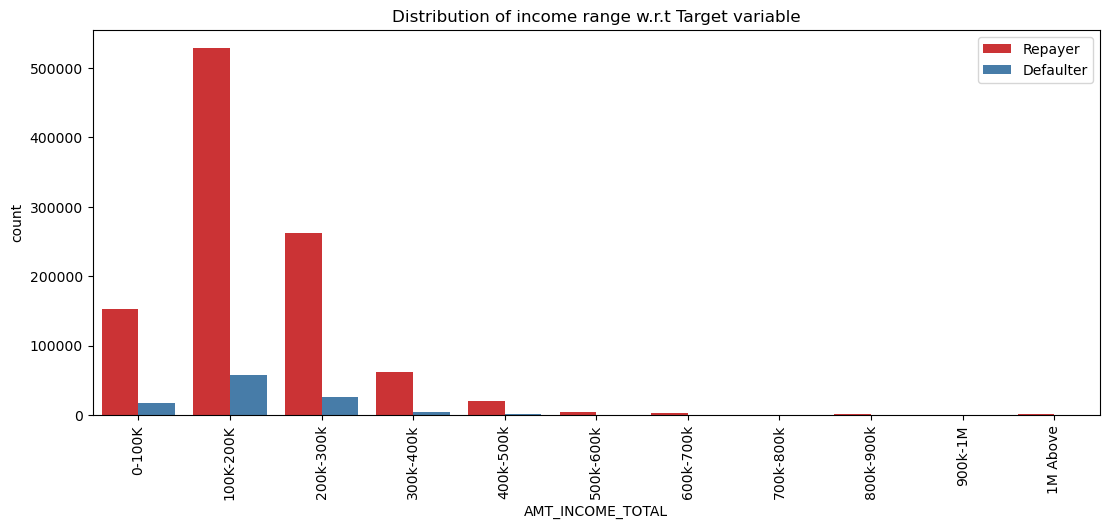

In [465]:
plt.figure(figsize=[13,5])
sns.countplot(x='INCOME_RANGE', data= merged_df ,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of income range w.r.t Target variable')
plt.legend(['Repayer','Defaulter'])
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

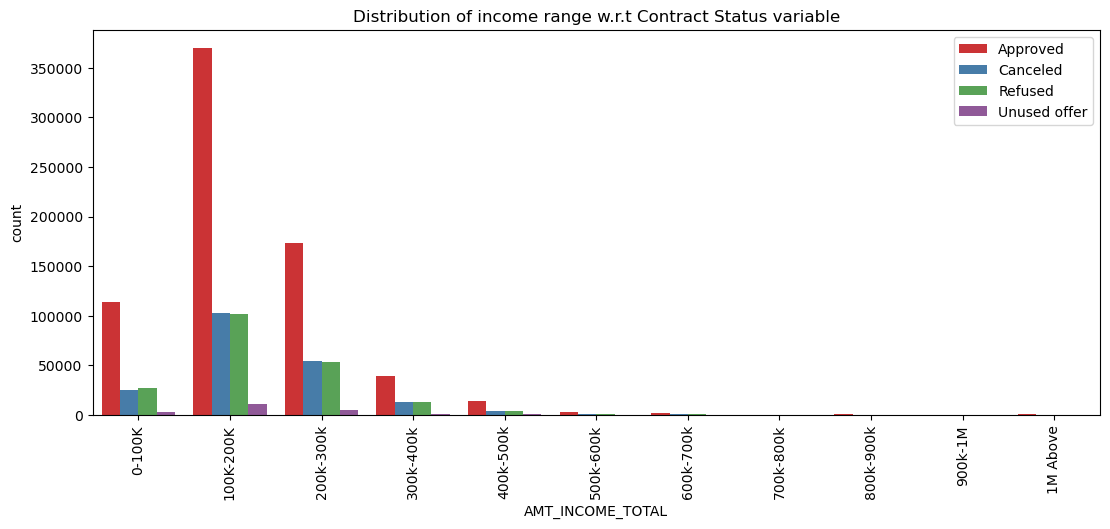

In [466]:
plt.figure(figsize=[13,5])
sns.countplot(x='INCOME_RANGE', data= merged_df ,hue='NAME_CONTRACT_STATUS', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of income range w.r.t Contract Status variable')
plt.legend()
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

### Inference : 
1.clients who has income range lies betwenn 100K-200K as they are looking more promising in terms of loan repayment

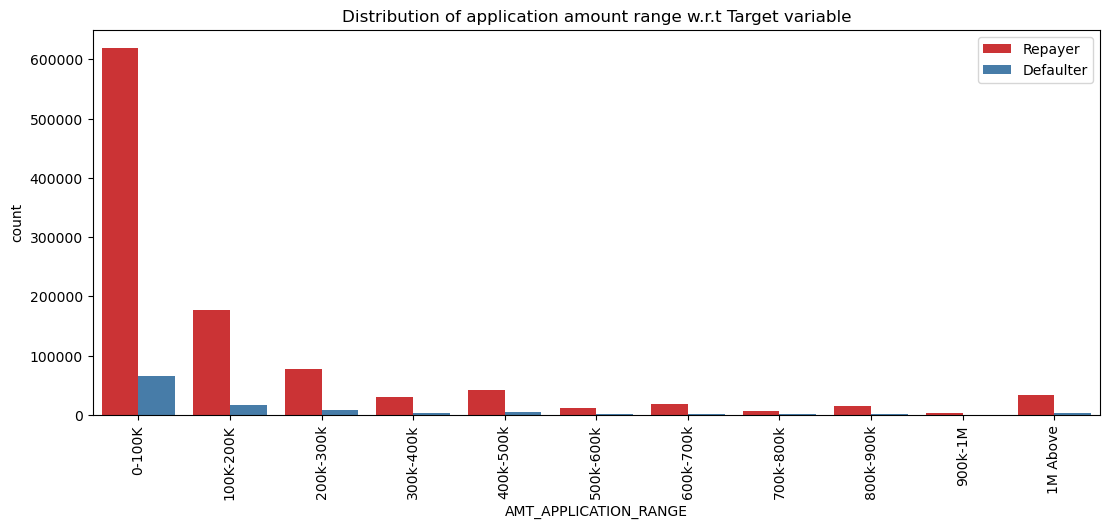

In [467]:
plt.figure(figsize=[13,5])
sns.countplot( x='AMT_APPLICATION_RANGE', data = merged_df ,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of application amount range w.r.t Target variable')
plt.legend(['Repayer','Defaulter'])
plt.xlabel('AMT_APPLICATION_RANGE')
plt.show()

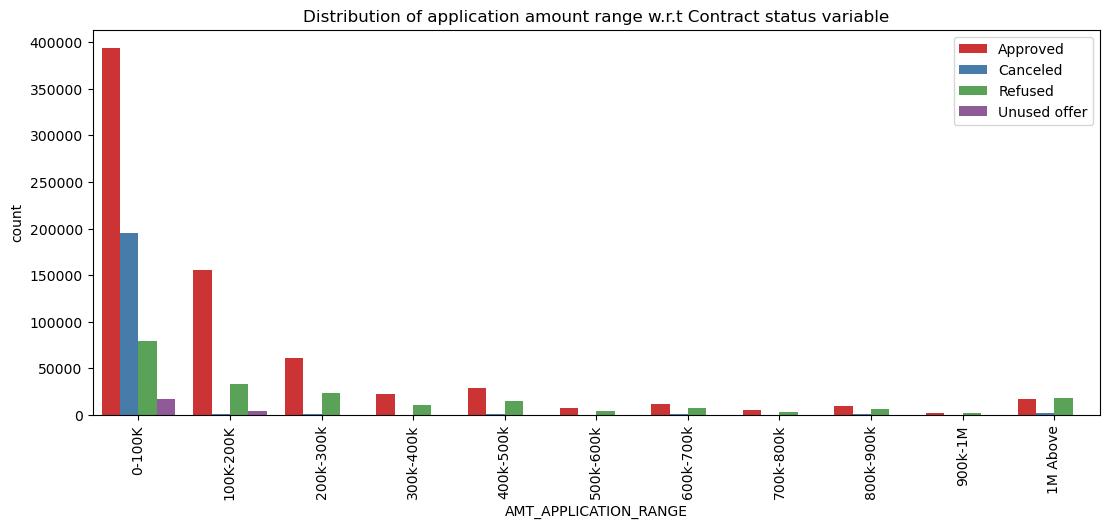

In [468]:
plt.figure(figsize=[13,5])
sns.countplot( x='AMT_APPLICATION_RANGE', data = merged_df ,hue='NAME_CONTRACT_STATUS', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of application amount range w.r.t Contract status variable')
plt.legend()
plt.xlabel('AMT_APPLICATION_RANGE')
plt.show()

### Inference : 
1. Clients who has application amount ranges between 100k-200K have very less chances to canceled their applications and they are also looking more promissing in terms loan repayment

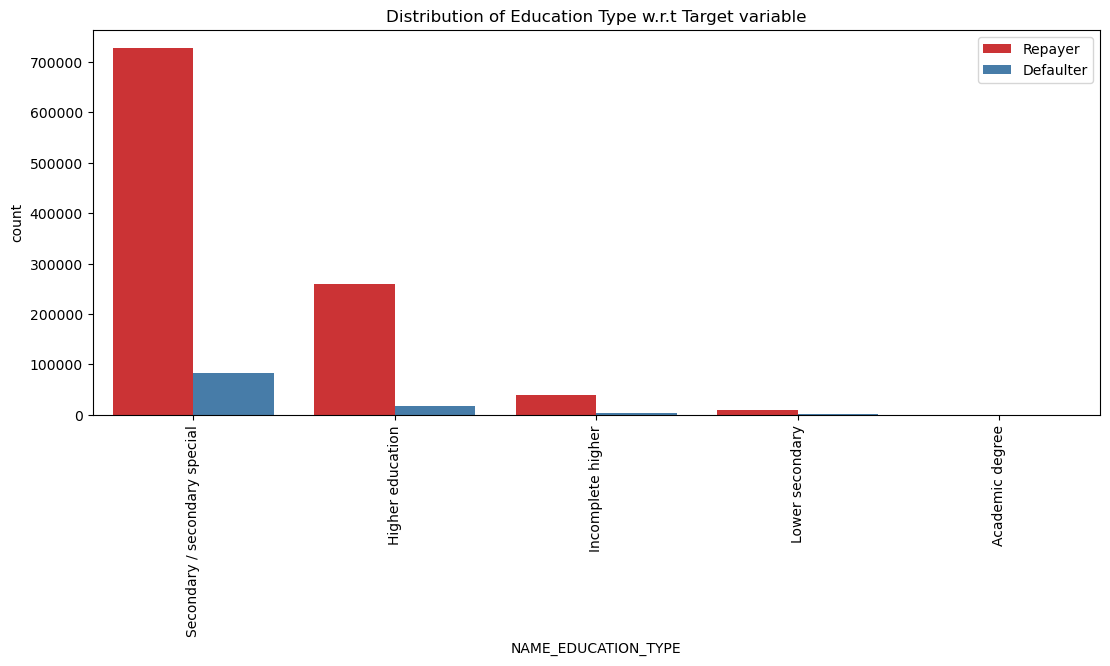

In [469]:
plt.figure(figsize=[13,5])

sns.countplot( x='NAME_EDUCATION_TYPE', data = merged_df ,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Education Type w.r.t Target variable')
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_EDUCATION_TYPE')
plt.show()

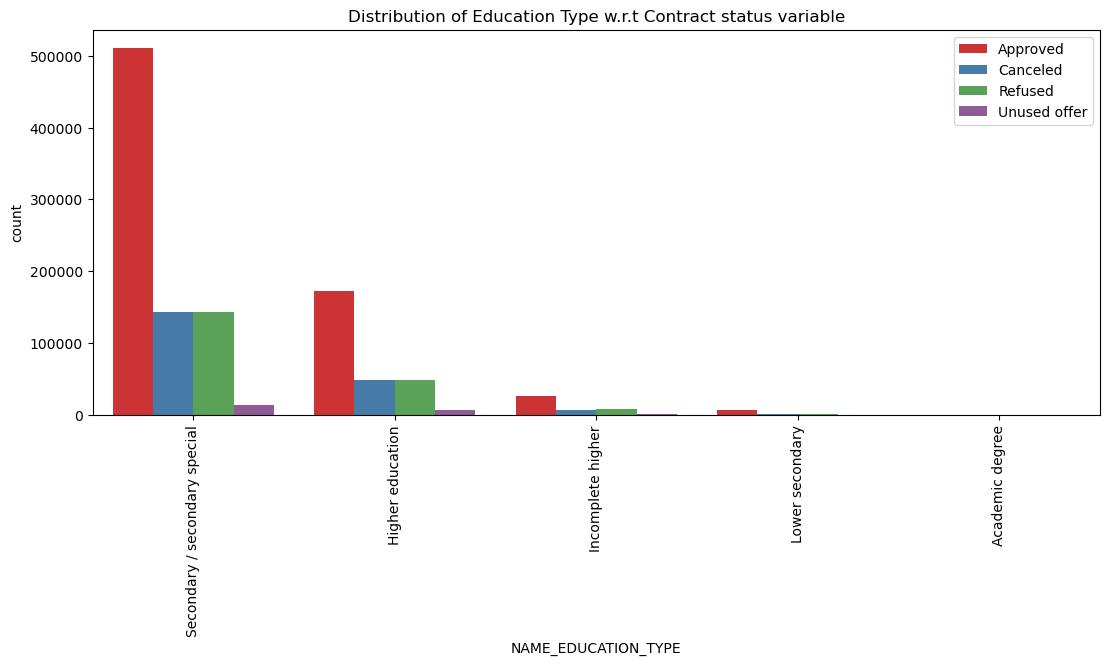

In [470]:
plt.figure(figsize=[13,5])

sns.countplot( x='NAME_EDUCATION_TYPE', data = merged_df ,hue='NAME_CONTRACT_STATUS', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Education Type w.r.t Contract status variable')
plt.legend()
plt.xlabel('NAME_EDUCATION_TYPE')
plt.show()

### Inference : 
1. Clients who has higher education are looking more promissing in terms of loan repayment and have more chances to get their application approved.

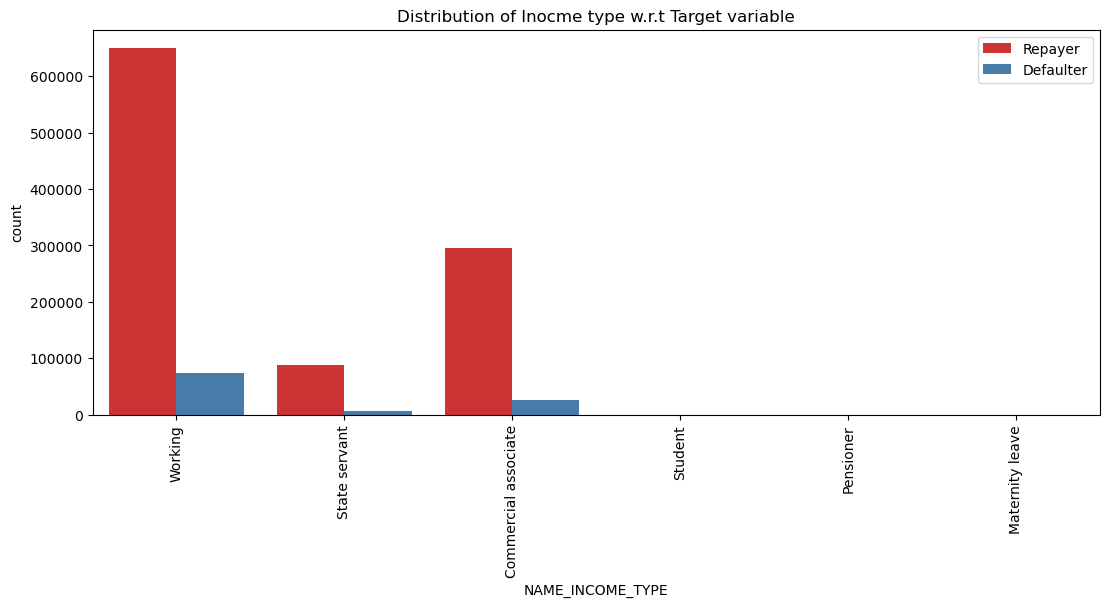

In [471]:
plt.figure(figsize=[13,5])

sns.countplot( x='NAME_INCOME_TYPE', data = merged_df ,hue='TARGET', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Inocme type w.r.t Target variable')
plt.legend(['Repayer','Defaulter'])
plt.xlabel('NAME_INCOME_TYPE')
plt.show()

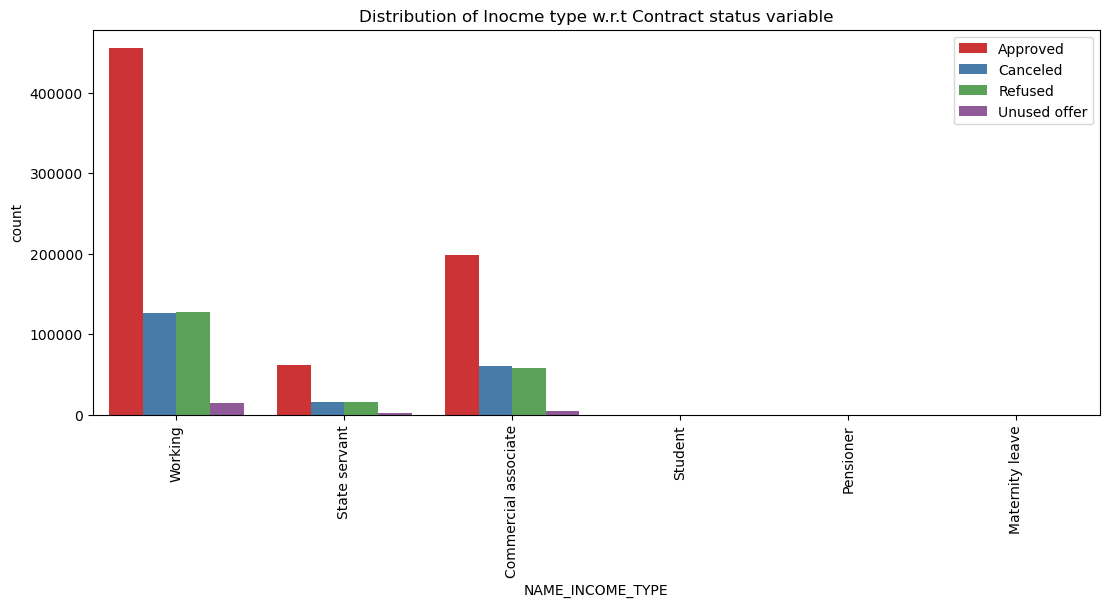

In [472]:
plt.figure(figsize=[13,5])

sns.countplot( x='NAME_INCOME_TYPE', data = merged_df ,hue='NAME_CONTRACT_STATUS', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Inocme type w.r.t Contract status variable')
plt.legend()
plt.xlabel('NAME_INCOME_TYPE')
plt.show()

### Inference :
1. State servant and commercial associates have more probability to repay their credits.

### Bivariate Analysis

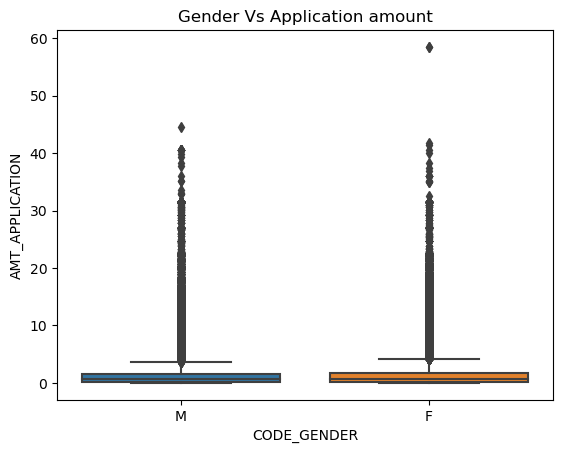

In [473]:
sns.boxplot(x= 'CODE_GENDER', y='AMT_APPLICATION', data= merged_df)
plt.title('Gender Vs Application amount')
plt.show()

### Inference :
1. There no as such difference in application amount w.r.t Applicants gender

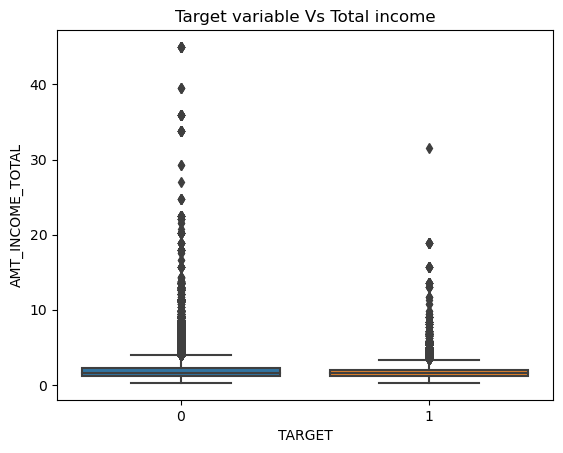

In [474]:
sns.boxplot(x= 'TARGET', y='AMT_INCOME_TOTAL', data= merged_df)
plt.title('Target variable Vs Total income')
plt.show()

### Inference : 
1. Clients who earns more have less chances to defualt on their credits

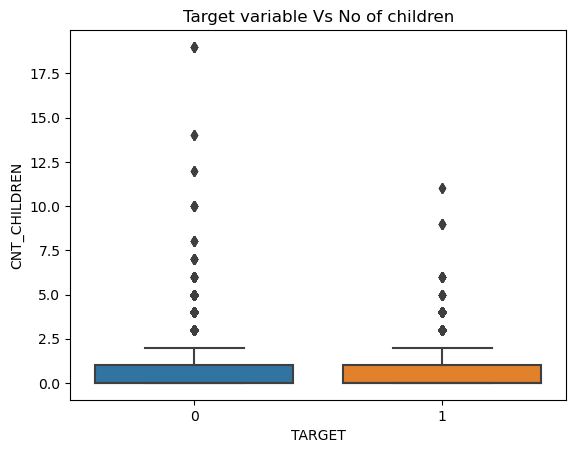

In [475]:
sns.boxplot(x= 'TARGET', y='CNT_CHILDREN', data= merged_df)
plt.title('Target variable Vs No of children')
plt.show()

### Inference :
1. There is no as such difference in target variable w.r.t no of childrens.

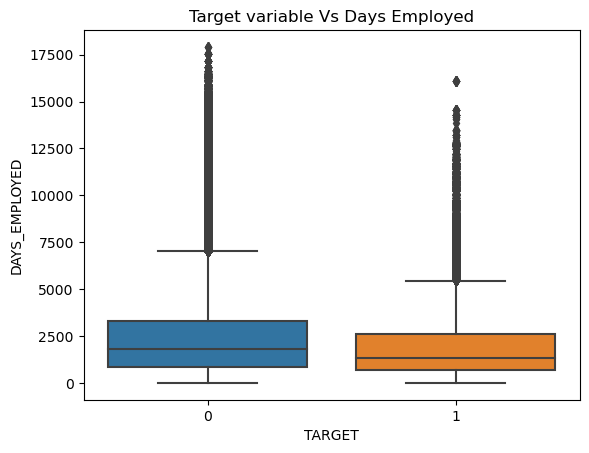

In [476]:
sns.boxplot(x= 'TARGET', y='DAYS_EMPLOYED', data= merged_df)
plt.title('Target variable Vs Days Employed')
plt.show()

### Inference : 
1. Clients having more days in current employement are looking more promising in terms of loan repayment

<h2 Style='color : Green'> Conclusion : </h2>

<h2 Style='color : Maroon'> Decisive factors for an applicant to be REPAYER , so we can Approve their applications </h2>

-  __Clients total income__ :
    -  Clients who has total income above 600K are looking more promising in terms of loan repayment
    -  clients has income more than 1M and they are in their current employment more than 20 year then they are most likely to repay their loan.
    
-  __Credit amount__ :
    -  Clients who has credit amount above 1M credit are looking more promissing in terms of repayment.
    -  Clients who has credit amount above 20 lakhs and having upto 4 family members are more likely to repay their credits.
    
-  __Clients age__ :
    -  If clients having age more than 50 years have more chance to repay their credits.

-  __No. of childrens__ : 
    -  Clients who has 0-2 childrens and also if they above 1M total income then they are most promising in terms of credit repayment
    
-  __Years in current employement__ :
    -  Defaulting percentage is decreasing as experienced range increases.
    -  Clients who has above 40+ years in their current employement are most likely to repay their loan.
    
-  __Contract Type__:
    -  Clients who are taking consumer loans are most promising in terms of loan repayment.
    
-  __Type of income__ :
    -  Businessmen and student's are most likely to repay their credits.
    
-  __Type of Education__ :
    -  Clients who has done higher level education are most promising in terms of loan repayment as they are more aware about financial literacy and importance healthy credit score.
    
-  __Goods Price__ :
    -  Clients who are purchasing goods ranges between 900K-1M have more probability to repay their credit.
    
-  __Annuity__ :
    -  Clients who has above 50K annuity are less likely to default.

<h2 Style='color : Maroon'> Decisive factors for an applicant to be DEFAULTER , so we can Reject their applications </h2>

-  __Clients Total Income__ :
    -  Clients who has income range from 0-100K are more likely to default as there percentage of defaults are approximately more than 10 %.
    
-  __Credit Range__ :
    -  Clients who are applied for credit range in between 500K-600K are more likely default followed by 400K-500K and 300K-400K credit range.
    
-  __Annuity Range__ :
    -  Clients who has annuity range in between 20K-30K are more likely to default on their credit.
    
-  __Goods Price Range__ :
    -  Clients who are purchasing goods ranges between 400K-500K are finding more dificulties in term of loan repayment.
    
-  __Clients Age__ : 
    -  Clients who's age ranges between 20-30 years are most likely default as there percentage of default is greater than 12% which is quite higher than other age groups
    
-  __Years in current employement__ :
    -  Clients who has current employment range in between 0-5 year are most likely to default on their loans.
    
-  __Clients Gender__ :
    -  Defaulting rate of male applicants is comparately higher than female applicants.
    
-  __Education Type__ :
    -  Clients who has secondary/secondary special education type are more likely to default on credit as default percentage is almost 15 % which is highest across all education types
    
-  __Housing Type__ :
    -  Rented people are more likely to default on credit.
    
-  __Occupation Type__ :
    -  Low skill laborers are most likely to default as there percentage of default are high.


<h2 Style='color : Maroon'> Decisive factors for an potential DEFAULTER who can be considered for loan by considering below factors to minimize the financial risk </h2>

-  __Clients Income__:
    -  Clients who has income range between 0-100K are applying more for loan comparing to others and also they have more chance to default so we can considered these clients by charging higher interest rates.
    
-  __Credit Range__ :
    -  Maximum clients having credit range in between 200K-500K and these client has more chances to default hence we can considered these client by charging higher interest rates.